In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data_sleep = pd.read_csv('/Users/alexanderdelriscomorales/Downloads/AI_ML_Files/Sleep_health_and_lifestyle_dataset.csv')
print(data_sleep.shape)
display(data_sleep.head())

(374, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Divide 'Blood Pressure' to (systolic/diastolic)

In [29]:
data_BP = pd.concat([data_sleep, data_sleep['Blood Pressure'].str.split('/', expand=True)], axis=1).drop(
    'Blood Pressure', axis=1)

In [30]:
data_BP=data_BP.rename(columns={0: 'BloodPressure_systolic', 1: 'BloodPressure_diastolic'})

In [31]:
data_BP['BloodPressure_systolic'] = data_BP['BloodPressure_systolic'].astype(float)
data_BP['BloodPressure_diastolic'] = data_BP['BloodPressure_diastolic'].astype(float)

# Exploratory Data Analysis

In [54]:
def check_variables(df: pd.DataFrame):
  cols = df.columns
  quantitative_cols = df._get_numeric_data().columns
  categorical_cols = list(set(cols) - set(quantitative_cols))
  return categorical_cols, list(set(quantitative_cols))

cat_cols, quan_cols = check_variables(data_BP)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['Gender', 'BMI Category', 'Sleep Disorder', 'Occupation']
quantitative columns: ['Daily Steps', 'Age', 'Sleep Duration', 'Stress Level', 'Quality of Sleep', 'Physical Activity Level', 'Person ID', 'BloodPressure_systolic', 'BloodPressure_diastolic', 'Heart Rate']


In [25]:
data_BP.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  BloodPressure_systolic   374 non-null    float64
 13  BloodPressure_diastolic  374 non-null    float64
dtypes: float64(3), int64(7), o

In [64]:
print(data_BP.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
BloodPressure_systolic       0
BloodPressure_diastolic      0
dtype: int64


In [65]:
data_BP['Sleep Disorder'] = data_BP['Sleep Disorder'].fillna('None')
data_BP.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_systolic,BloodPressure_diastolic
25,26,Male,30,Doctor,7.9,7,75,6,Normal,70,8000,None,120.0,80.0
132,133,Male,38,Lawyer,7.3,8,60,5,Normal,68,8000,None,130.0,85.0
241,242,Male,44,Salesperson,6.3,6,45,7,Overweight,72,6000,Insomnia,130.0,85.0
51,52,Male,32,Engineer,7.5,8,45,3,Normal,70,8000,None,120.0,80.0
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140.0,95.0


In [68]:
print(data_BP.isnull().sum())
print(data_BP.isna().sum())

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
BloodPressure_systolic     0
BloodPressure_diastolic    0
dtype: int64
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
BloodPressure_systolic     0
BloodPressure_diastolic    0
dtype: int64


# Categorical Columns

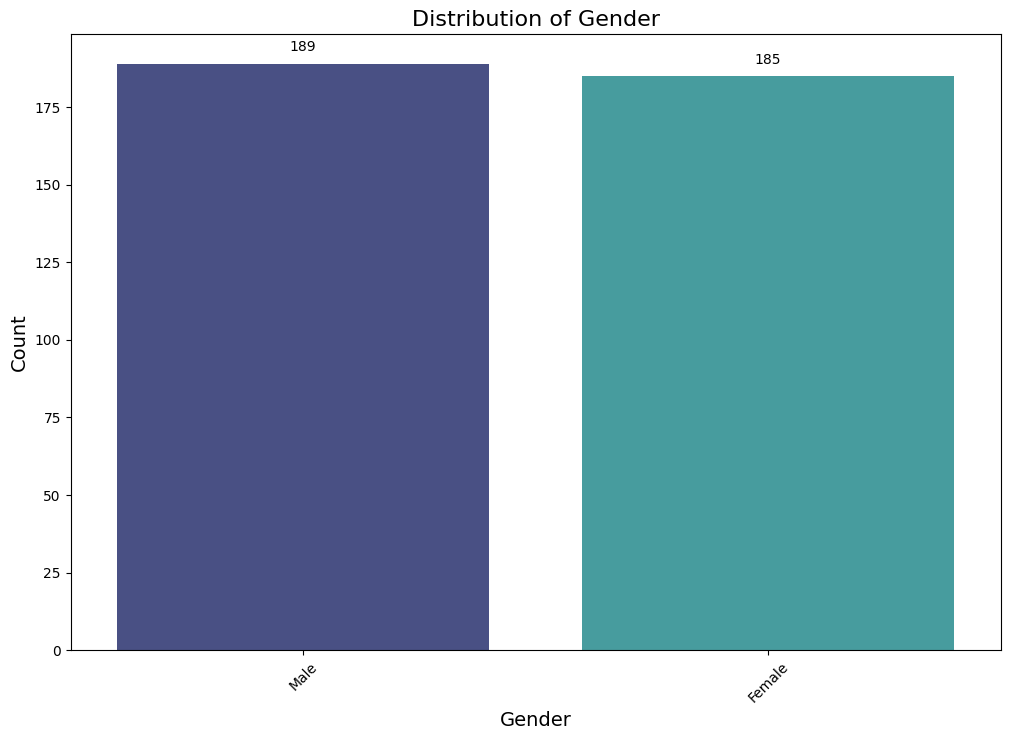

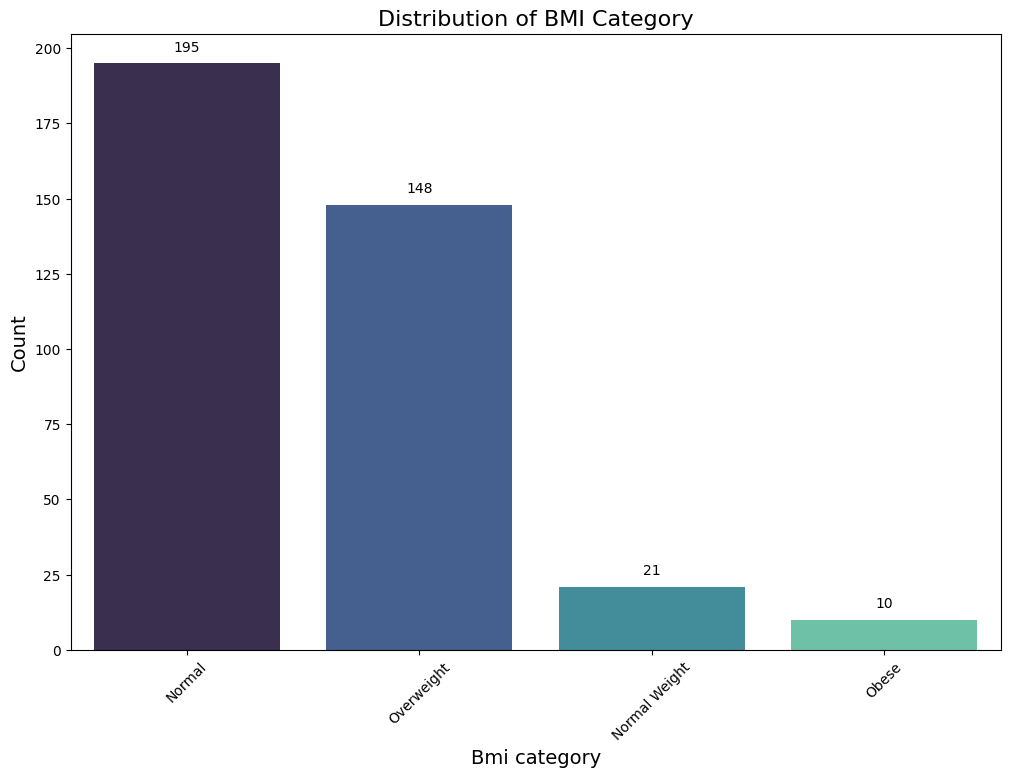

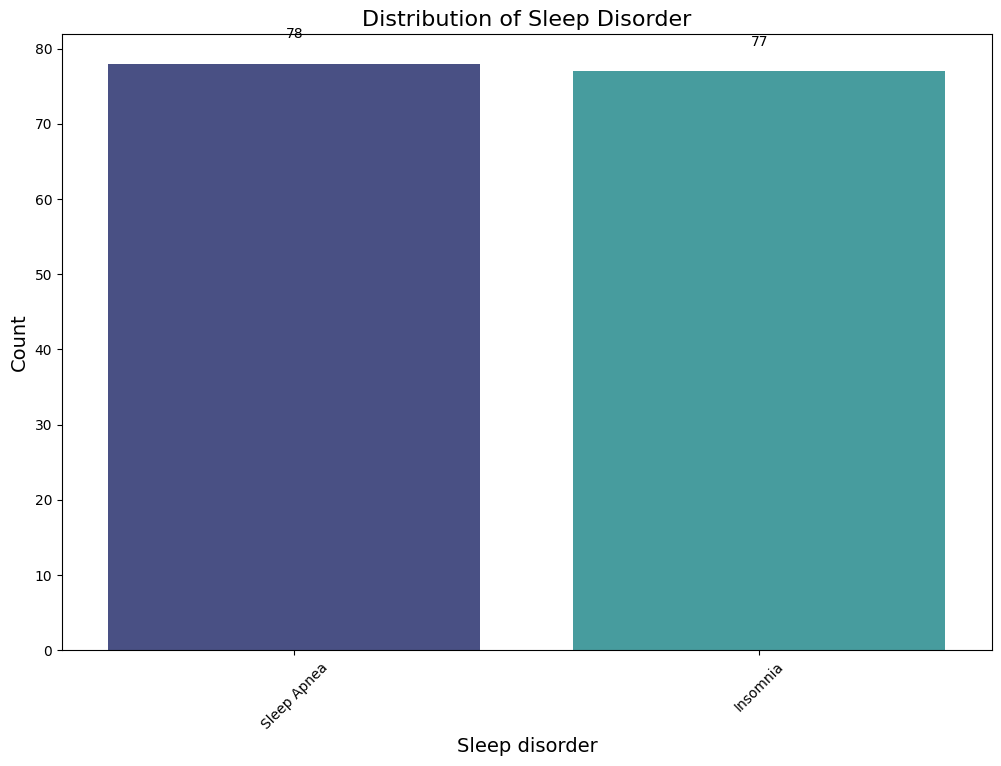

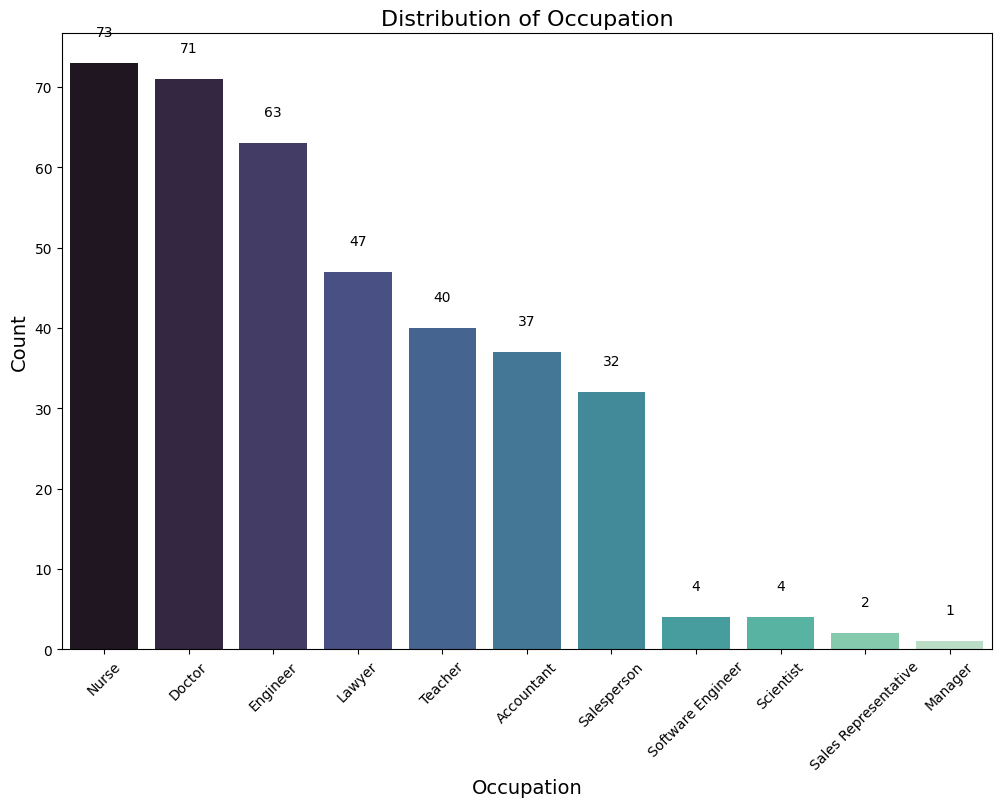

In [42]:
categorical_cols = ['Gender', 'BMI Category', 'Sleep Disorder', 'Occupation']

for col in categorical_cols:
    plt.figure(figsize=(12, 8))
    splot = sns.countplot(data=data_sleep, x=col, order=data_sleep[col].value_counts().index, palette='mako')
    
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.ylabel("Count", fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=14)
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

    # Adding the count on each bar
    for p in splot.patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, 
                 height + 3,  # Adding a little space above the bar
                 '{:1.0f}'.format(height),  # Label
                 ha='center', va='bottom')
    
    plt.show()

# Quantitative Values

In [43]:
display(data_BP.describe())

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BloodPressure_systolic,BloodPressure_diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


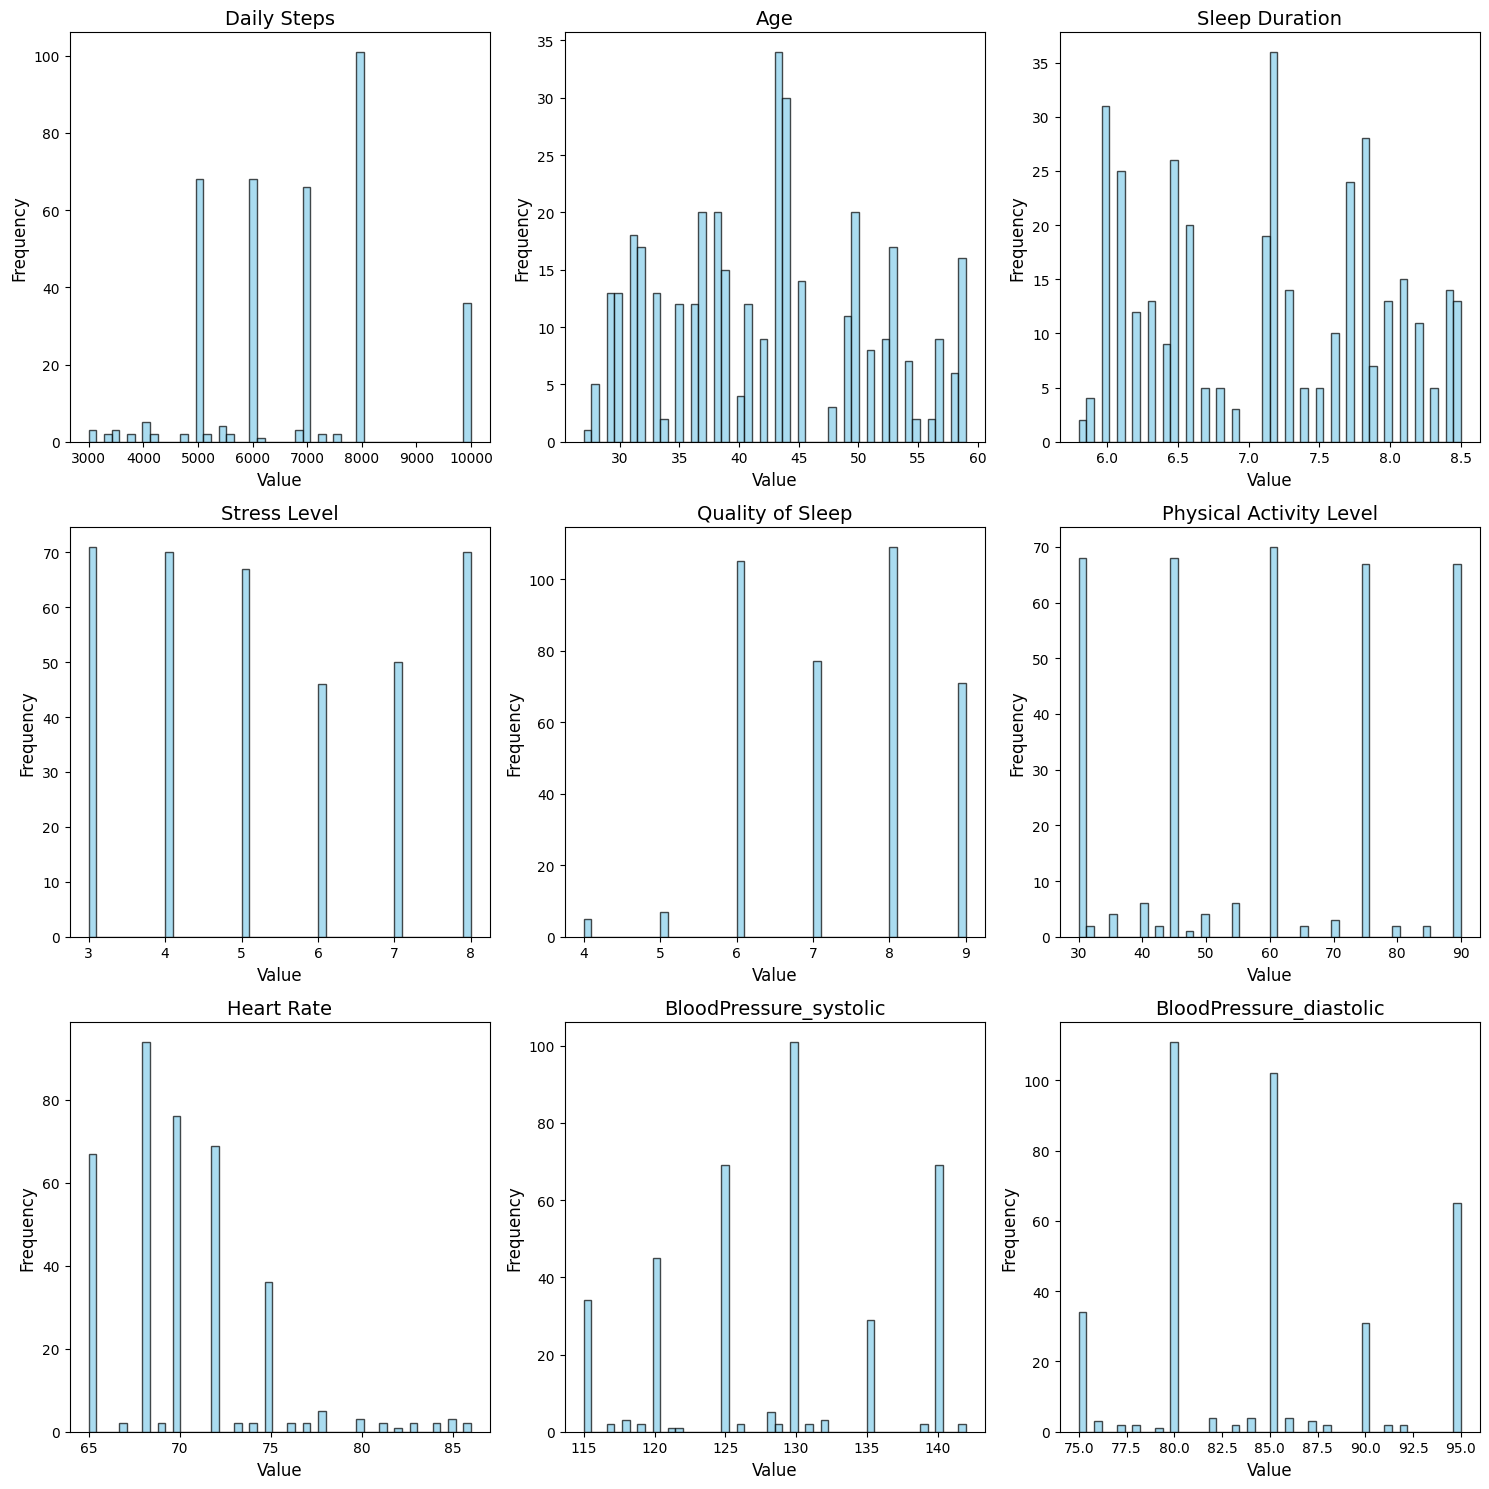

In [44]:
# Select quantitative variables
quan_cols = ['Daily Steps', 'Age', 'Sleep Duration', 'Stress Level', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'BloodPressure_systolic', 'BloodPressure_diastolic']

# Decide on the subplot grid dimensions
n_cols = 3
n_rows = -(-len(quan_cols) // n_cols)  # Ceiling division to get required number of rows

# Plot histograms
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust the figure size
axs = axs.ravel()

for i, col in enumerate(quan_cols):
    axs[i].hist(data_BP[col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axs[i].set_title(col, fontsize=14)
    axs[i].set_xlabel('Value', fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)

# Hide any unused subplots if the number of variables is less than the total subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

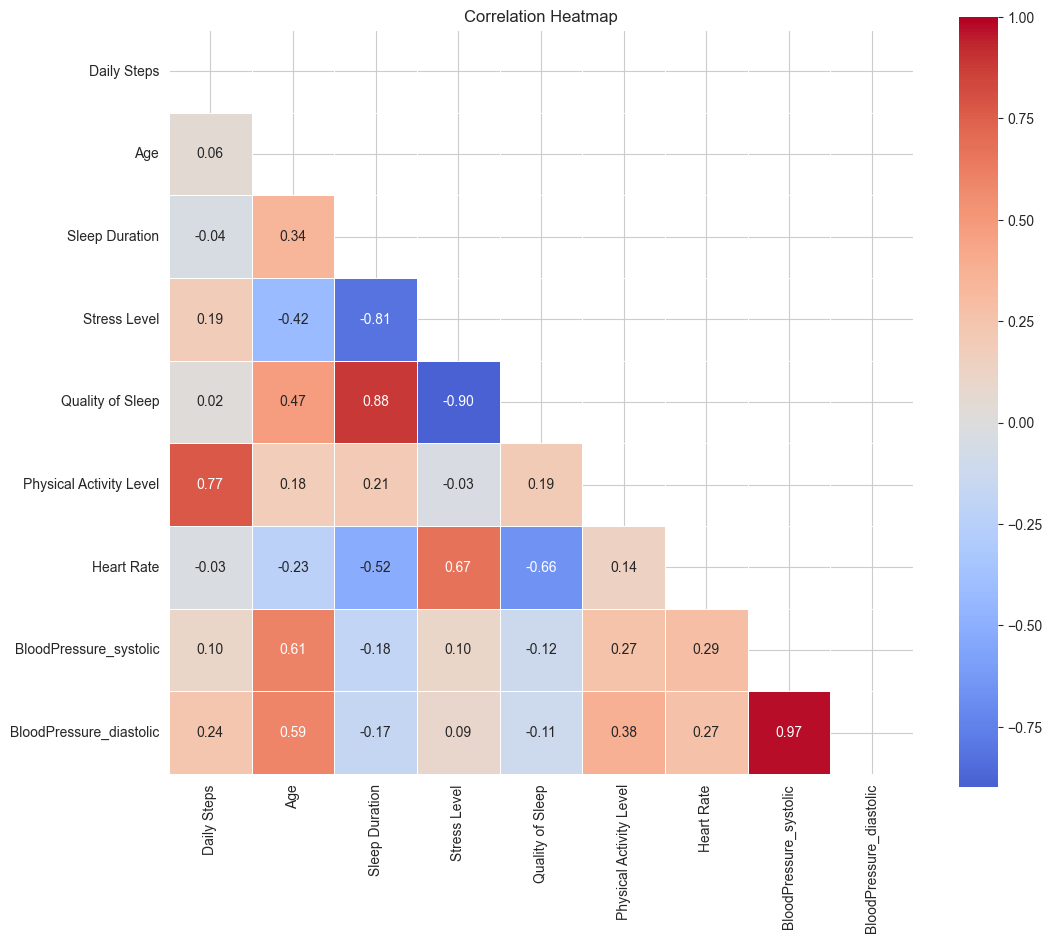

In [51]:
# Compute the correlation matrix
corr = data_BP[quan_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Define the columns to be analyzed
quan_cols = ['Daily Steps', 'Age', 'Sleep Duration', 'Stress Level', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'BloodPressure_systolic', 'BloodPressure_diastolic']


# Loop through the columns and create a boxplot and histogram for each
for col in quan_cols:
    # Create a subplot with two plots on top of each other
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    
    # Create a boxplot for the column
    sns.boxplot(x=data_BP[col], ax=ax1)
    ax1.set_title(f"Boxplot of {col}")
    
    # Create a histogram for the column
    sns.histplot(data=data_BP, x=col, kde=True, ax=ax2)
    ax2.set_title(f"Histogram of {col}")
    
    # Show the plots
    plt.show()

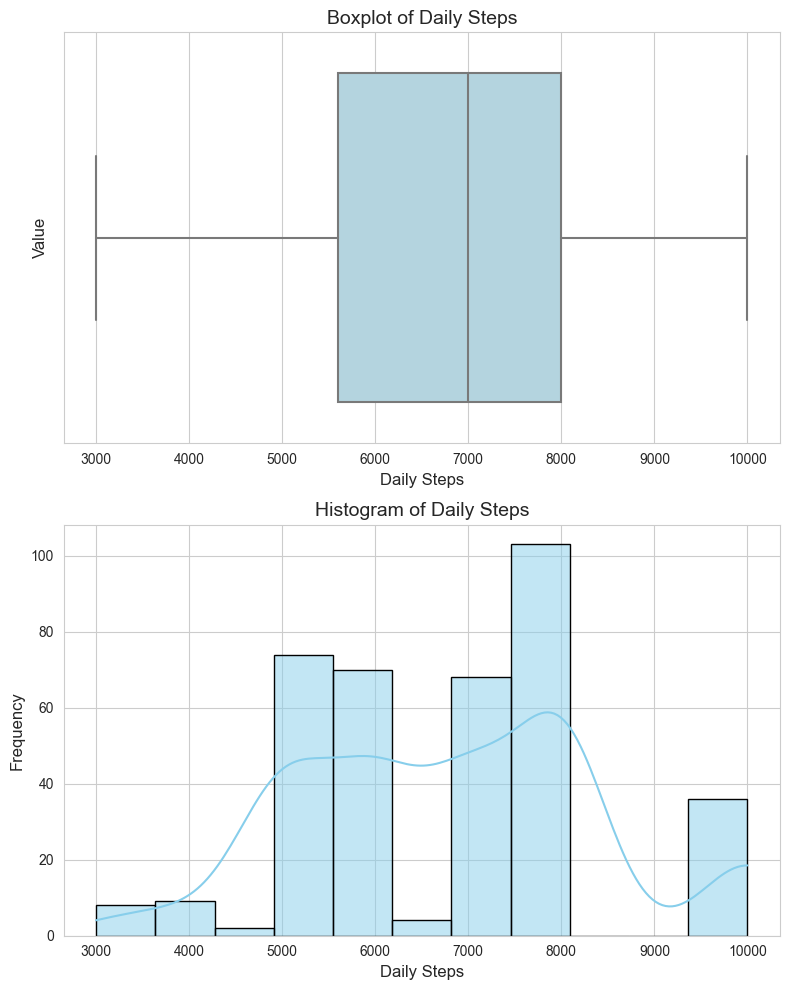

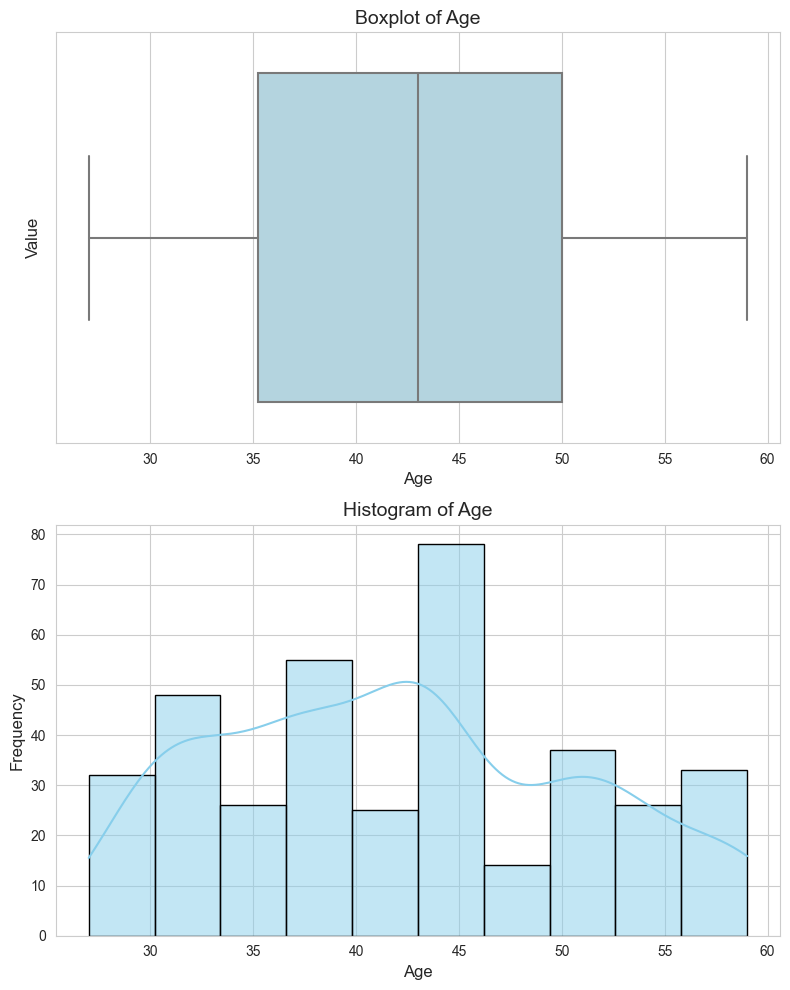

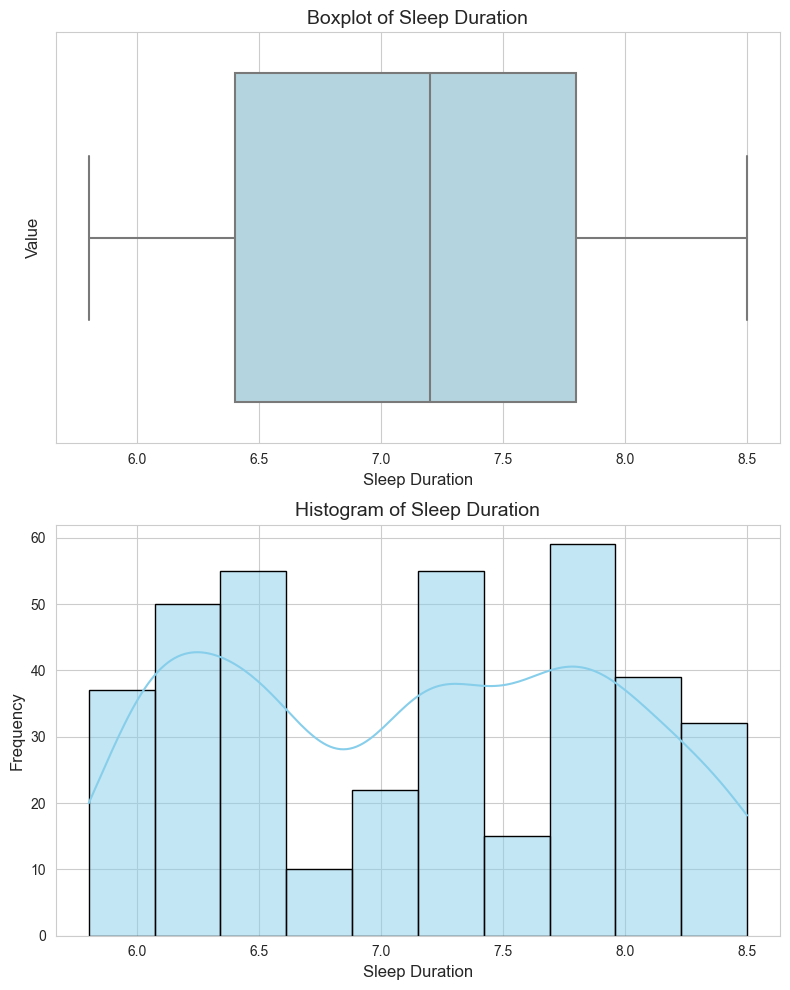

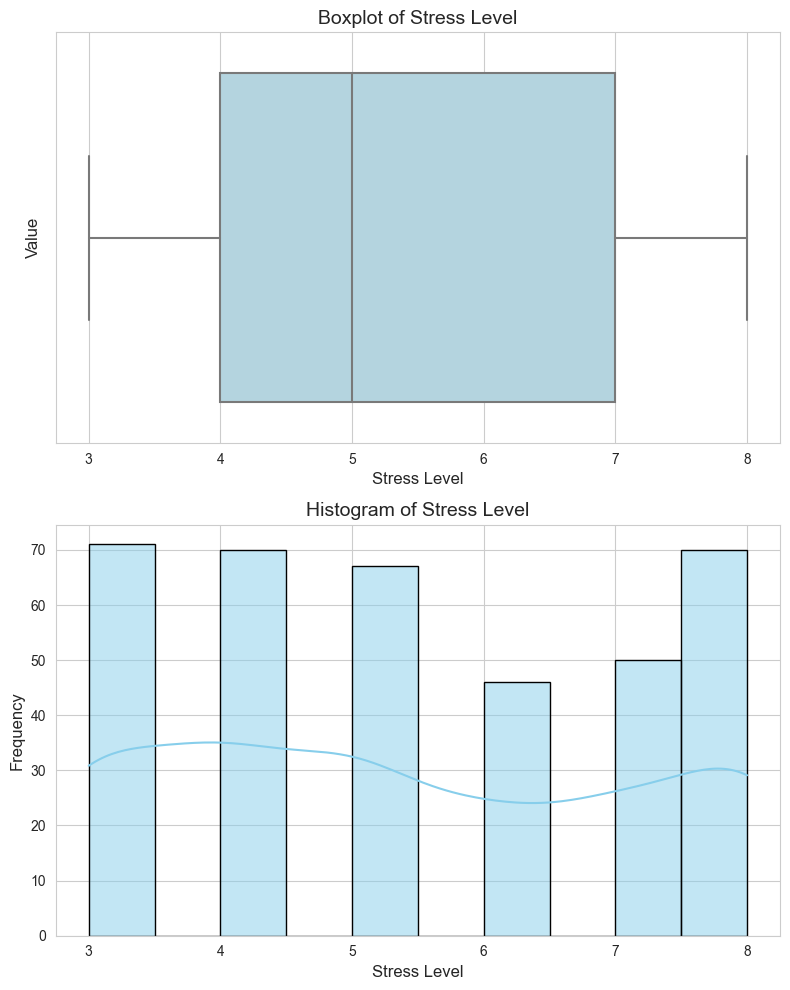

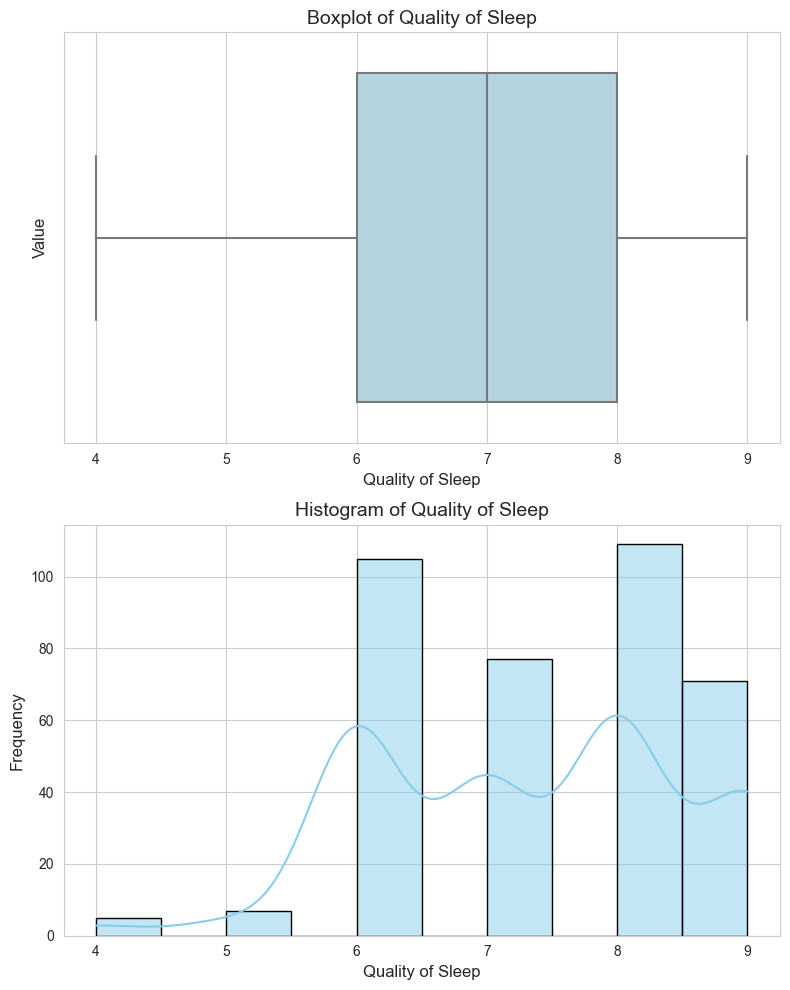

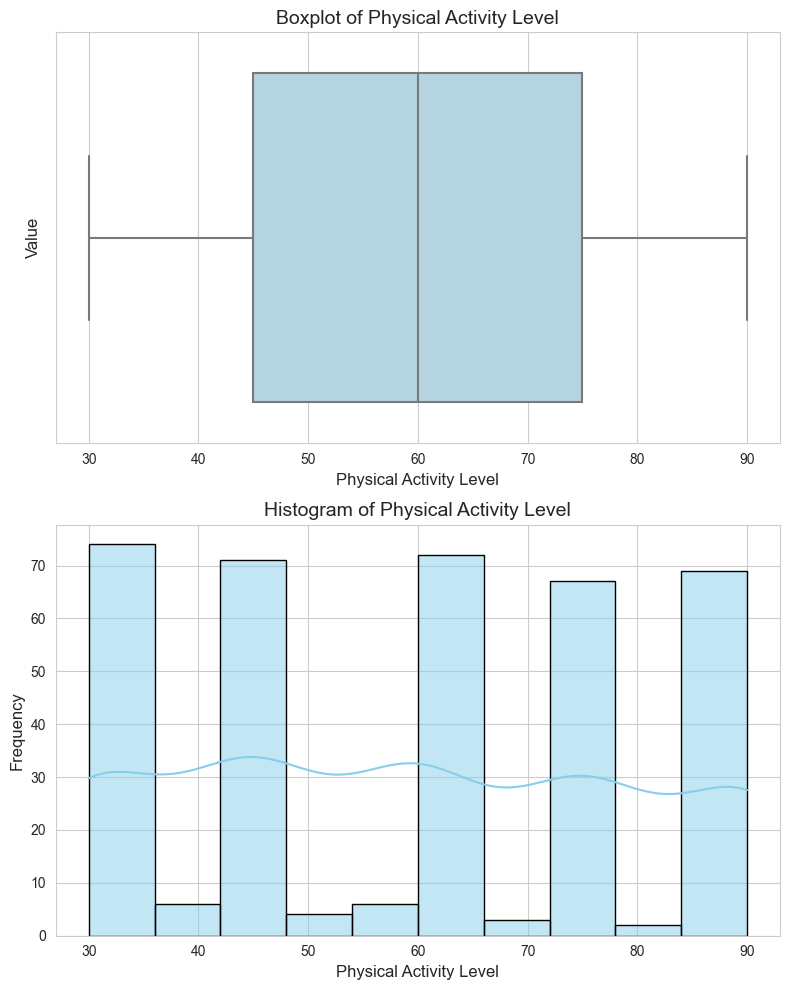

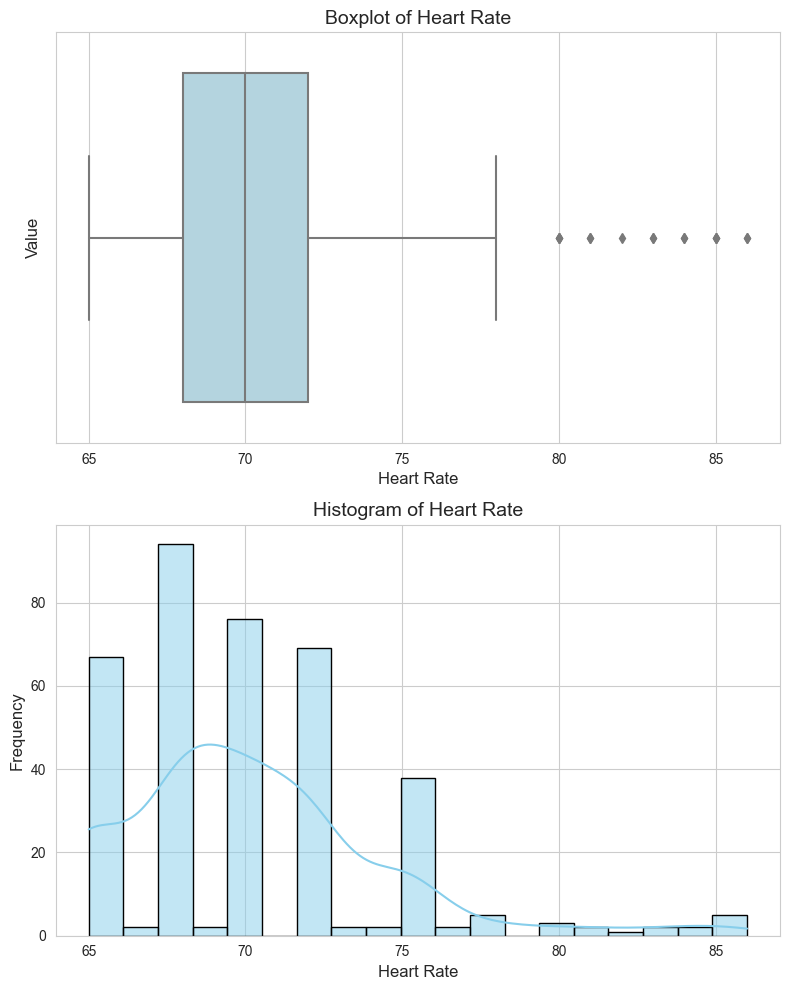

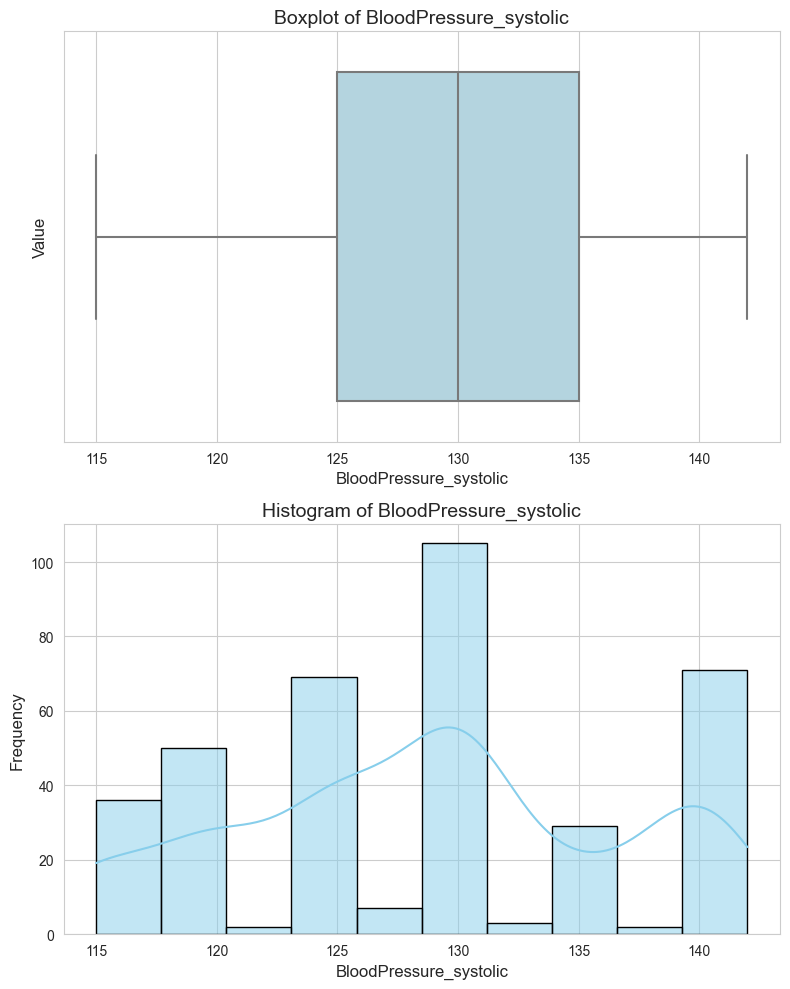

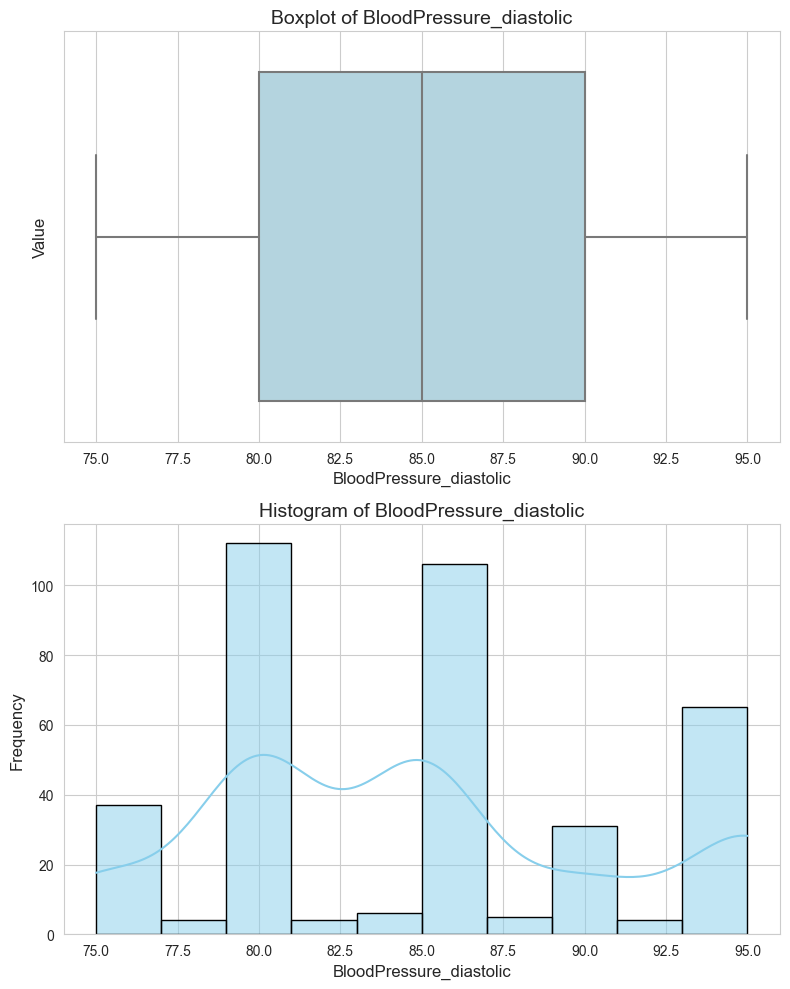

In [45]:
# Optional: Set a style
sns.set_style("whitegrid")

# Define the columns to be analyzed
quan_cols = ['Daily Steps', 'Age', 'Sleep Duration', 'Stress Level', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'BloodPressure_systolic', 'BloodPressure_diastolic']

# Loop through the columns and create a boxplot and histogram for each
for col in quan_cols:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Boxplot
    sns.boxplot(x=data_BP[col].dropna(), ax=ax1, color='lightblue')
    ax1.set_title(f"Boxplot of {col}", fontsize=14)
    ax1.set_xlabel(col, fontsize=12)
    ax1.set_ylabel('Value', fontsize=12)

    # Histogram with KDE
    sns.histplot(data_BP[col].dropna(), kde=True, ax=ax2, color='skyblue', edgecolor='black')
    ax2.set_title(f"Histogram of {col}", fontsize=14)
    ax2.set_xlabel(col, fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)

    plt.tight_layout()
    plt.show()

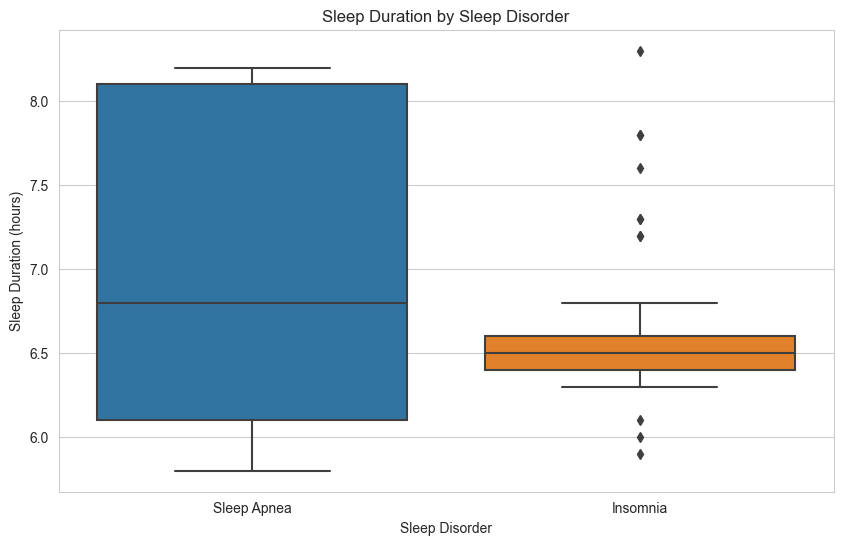

In [46]:
# Boxplot for Sleep Duration vs. Sleep Disorder
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=data_BP)
plt.title("Sleep Duration by Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Sleep Duration (hours)")
plt.show()

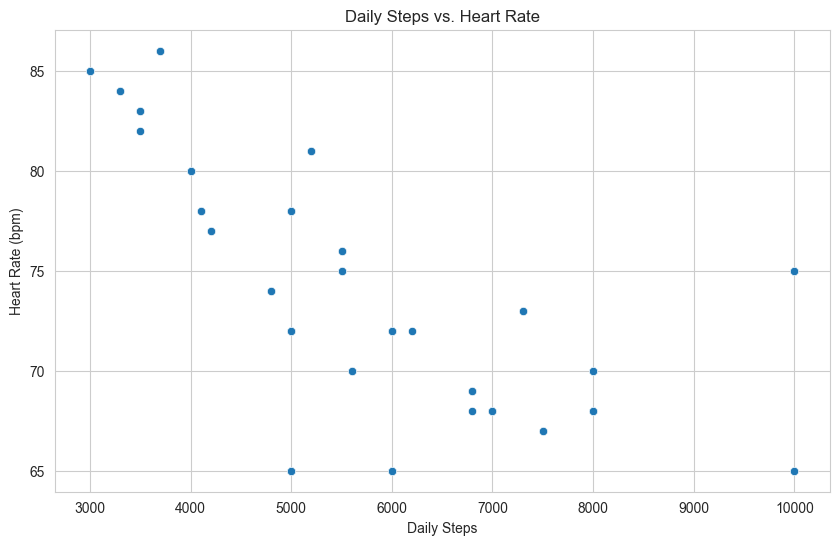

In [47]:
# 'Daily Steps' and 'Heart Rate'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily Steps', y='Heart Rate', data=data_sleep)
plt.title("Daily Steps vs. Heart Rate")
plt.xlabel("Daily Steps")
plt.ylabel("Heart Rate (bpm)")
plt.show()


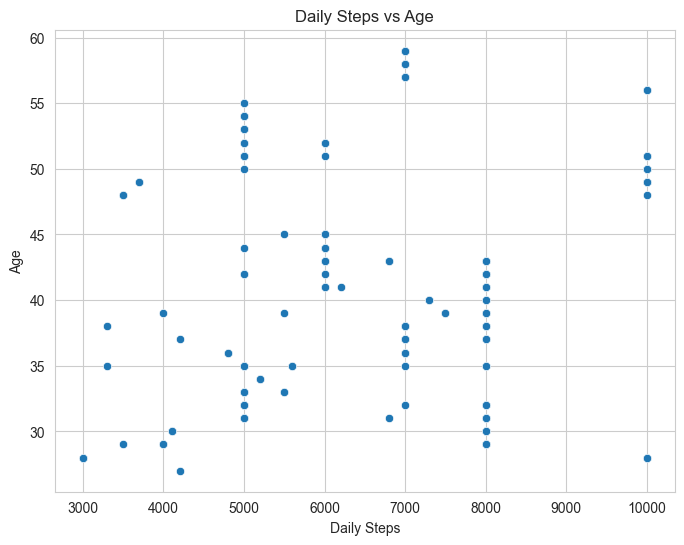

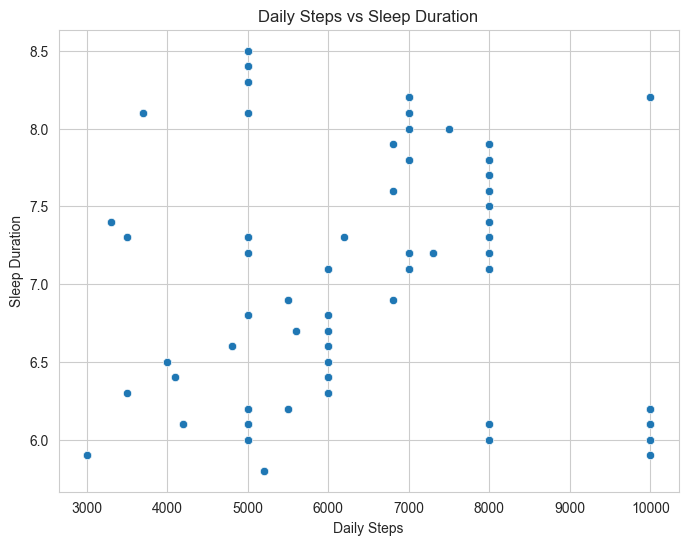

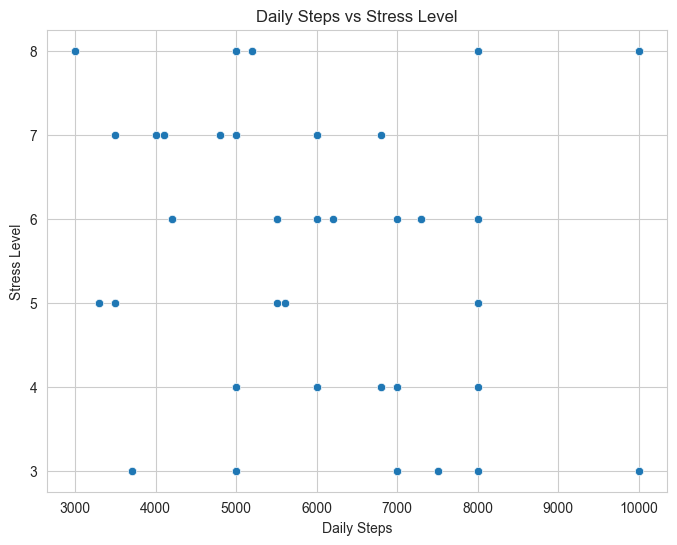

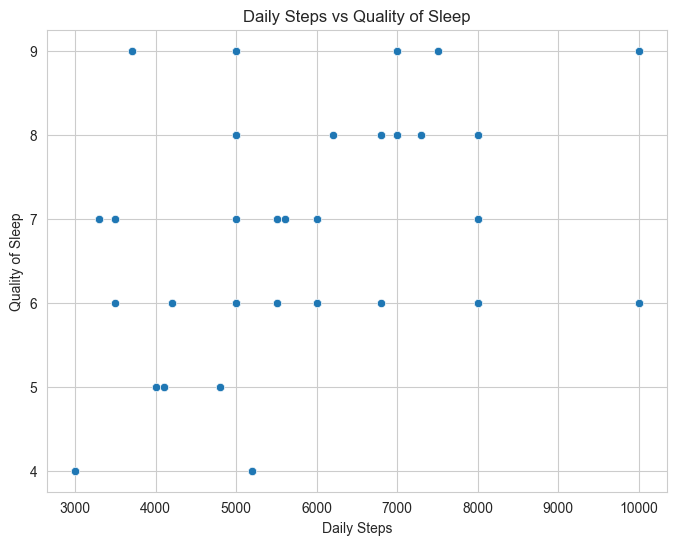

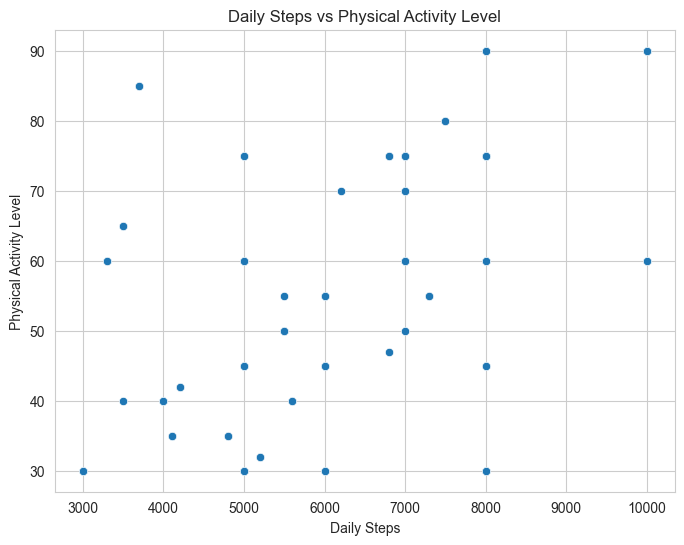

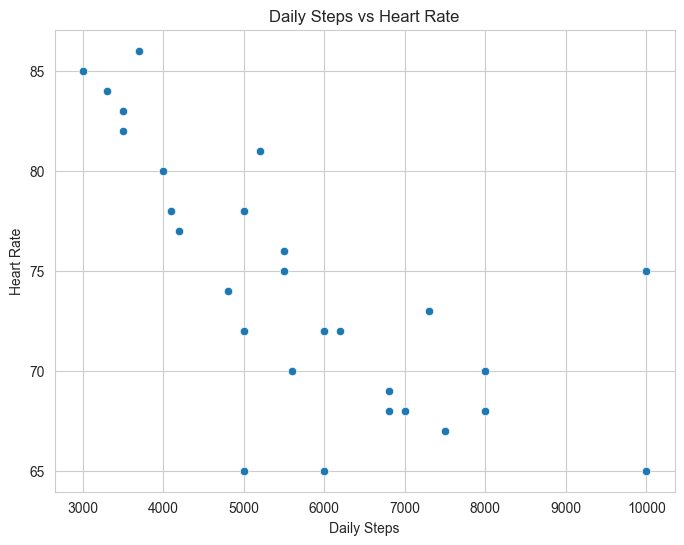

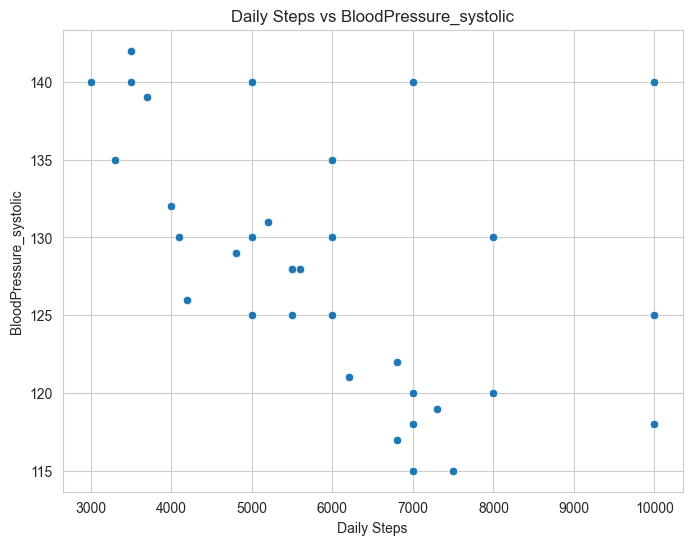

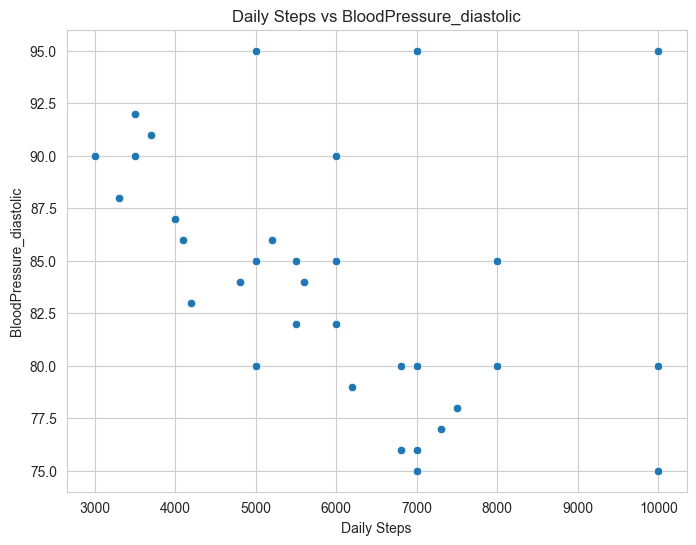

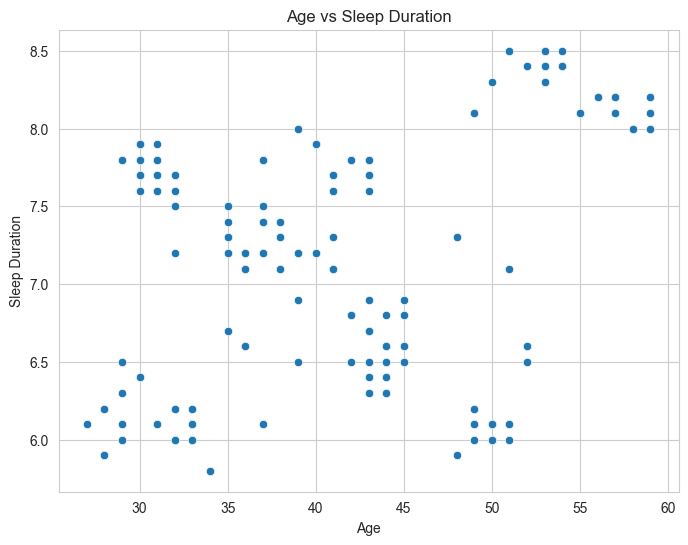

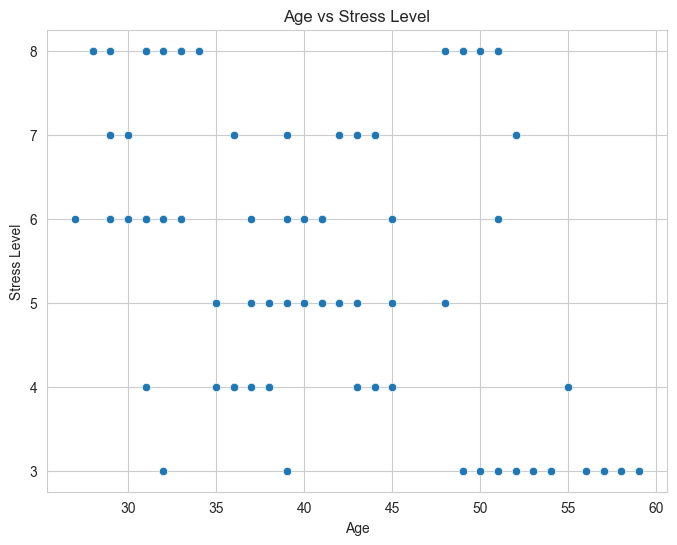

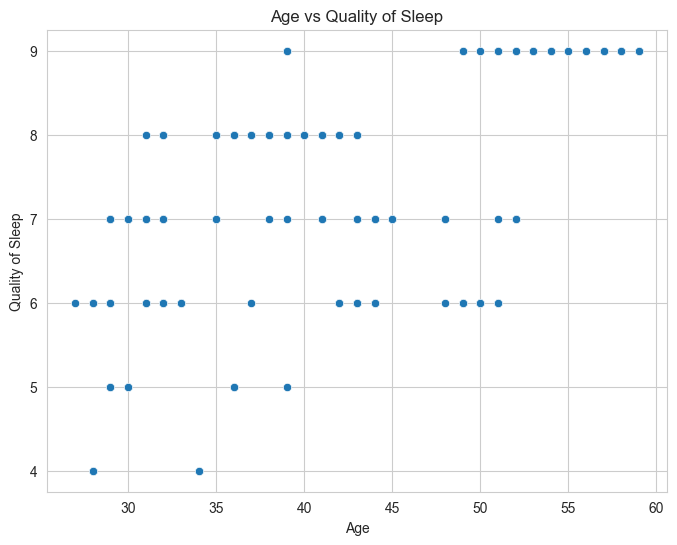

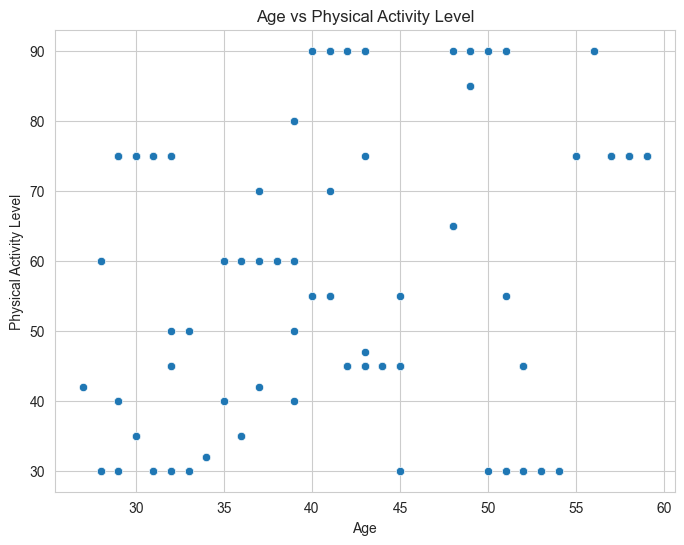

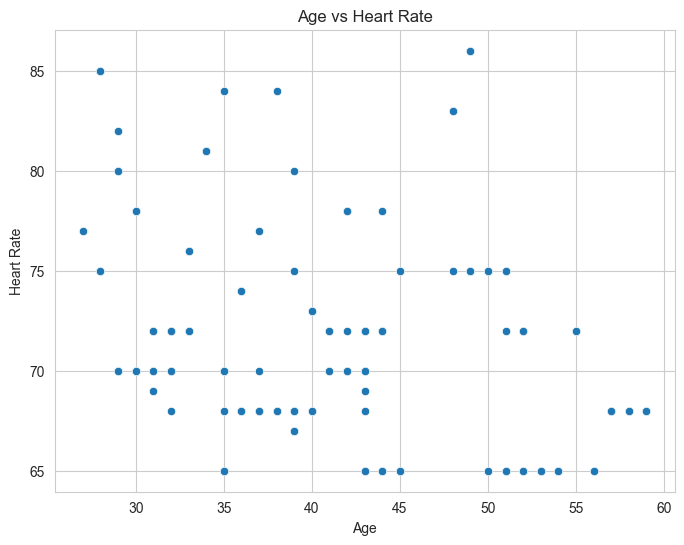

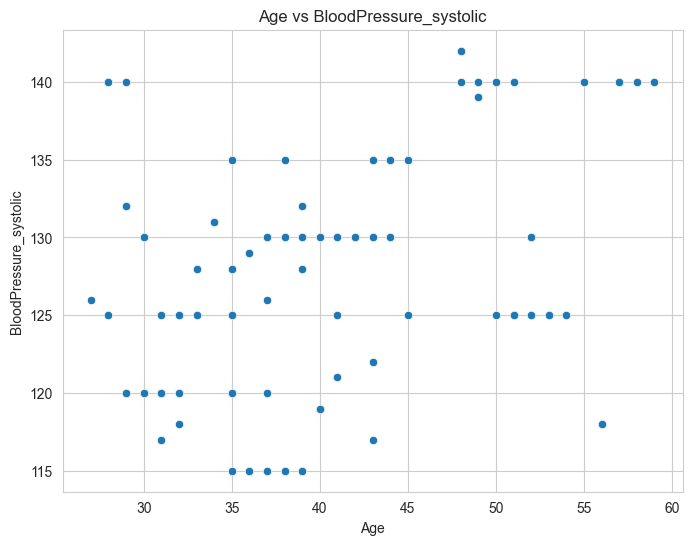

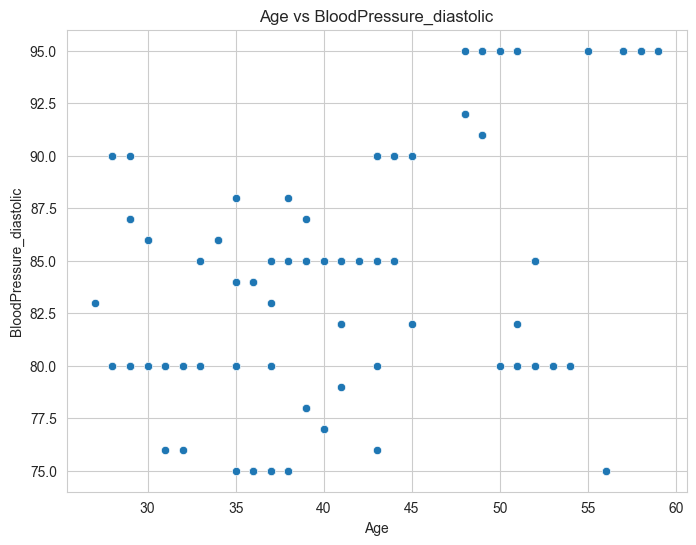

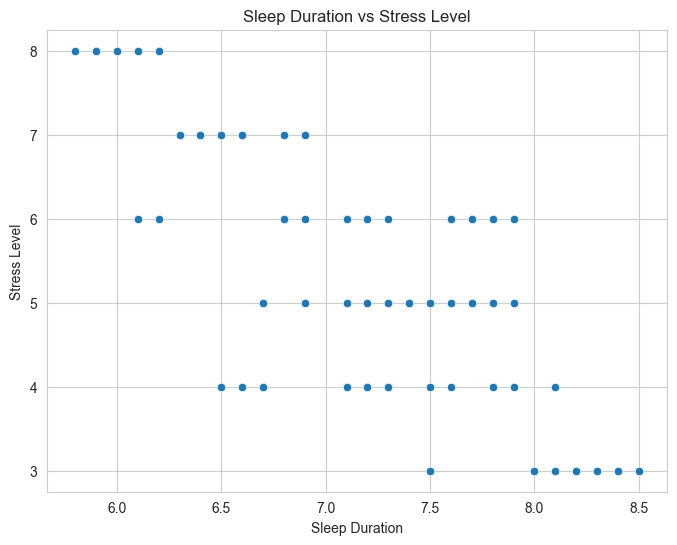

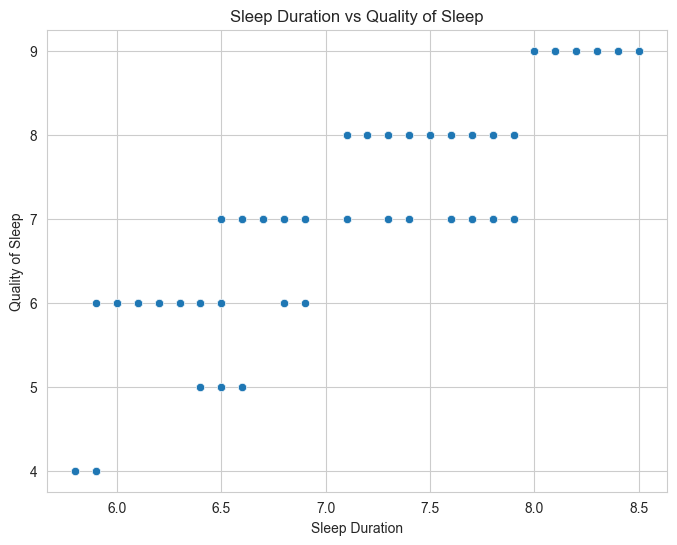

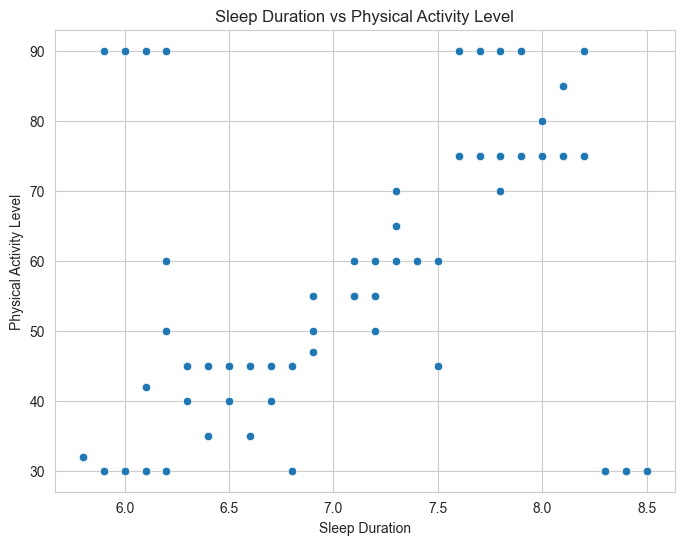

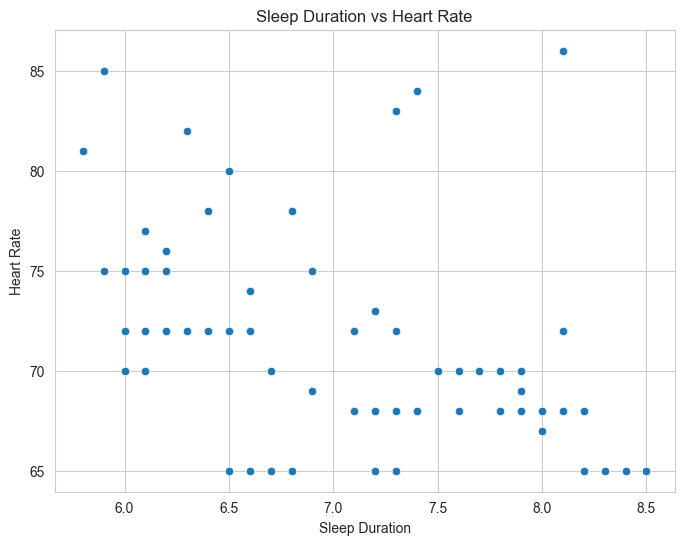

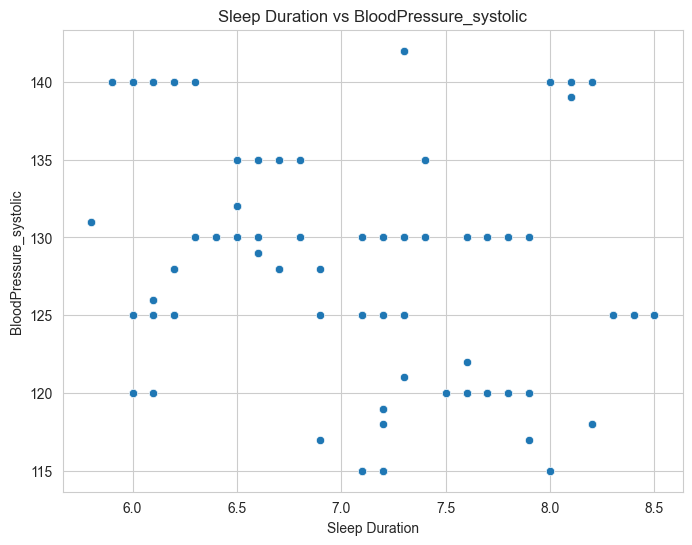

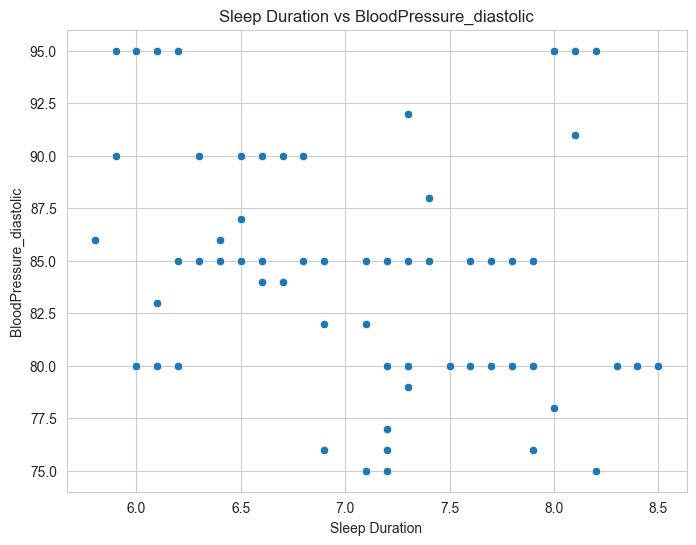

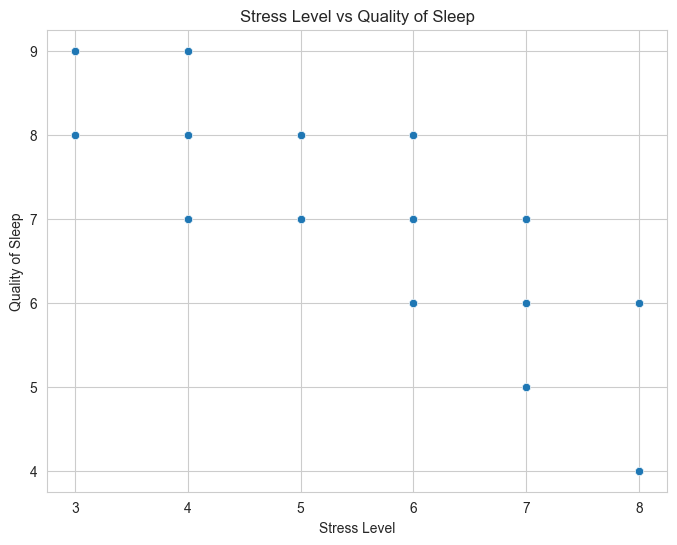

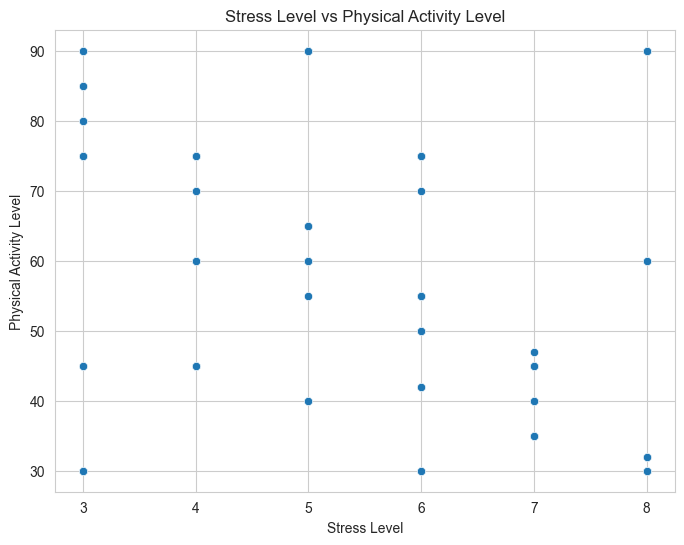

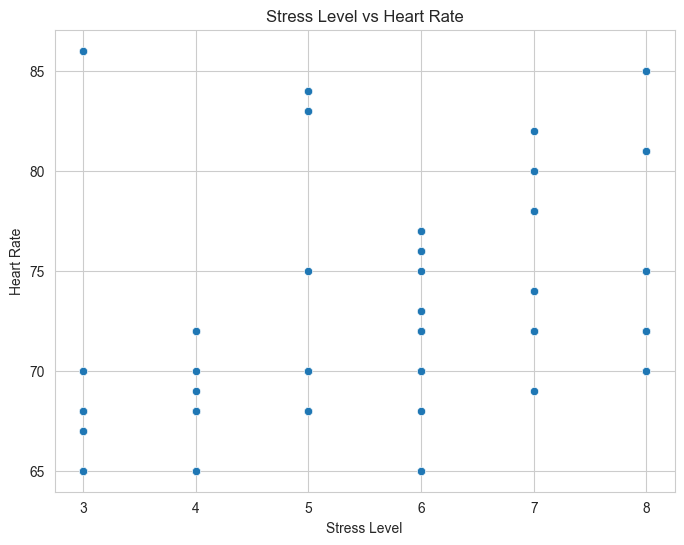

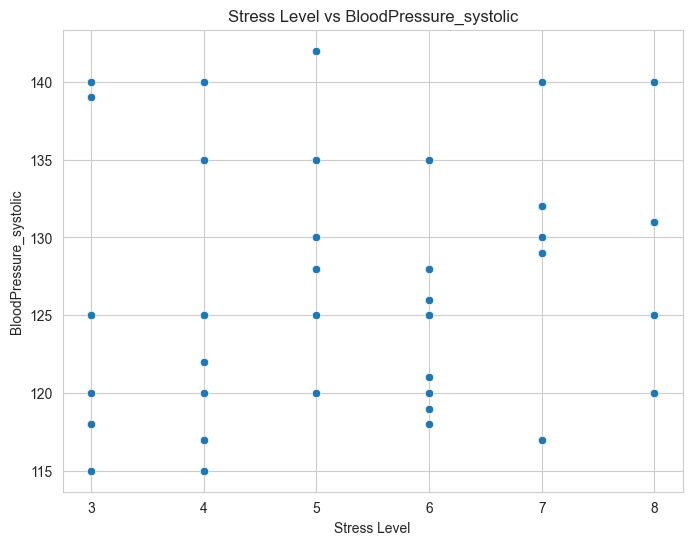

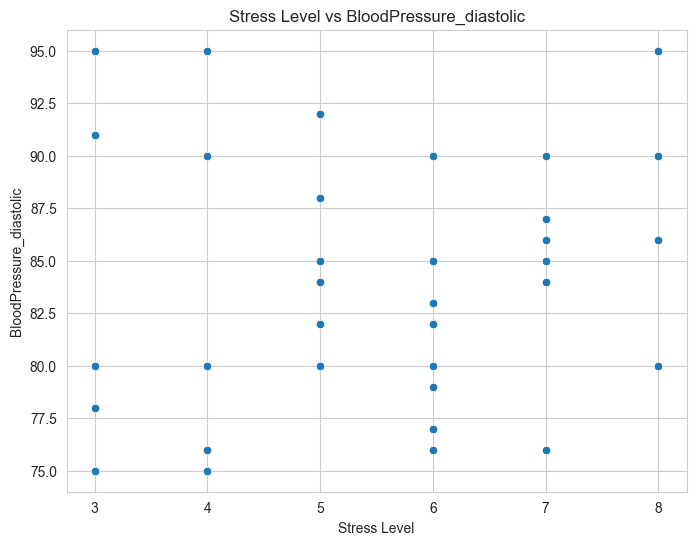

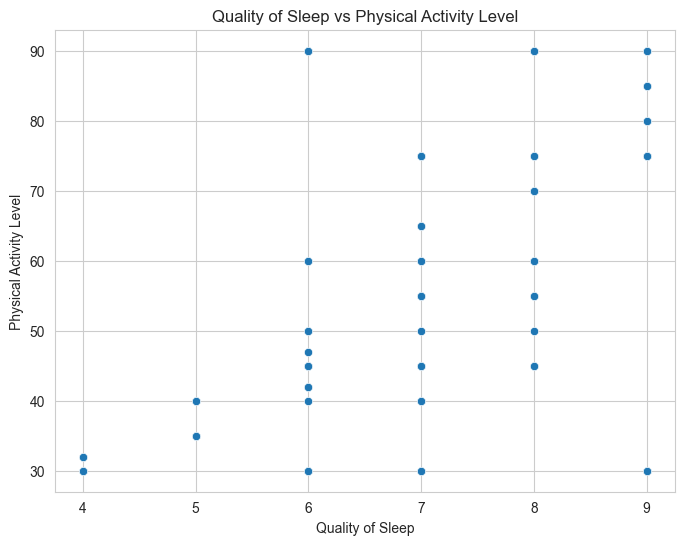

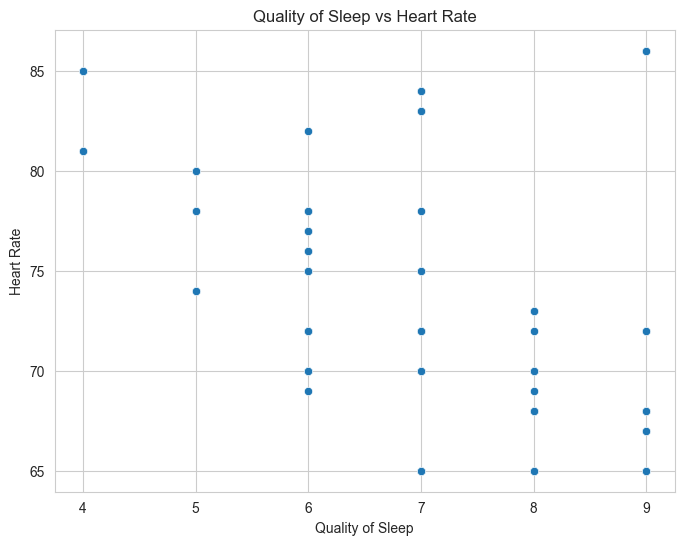

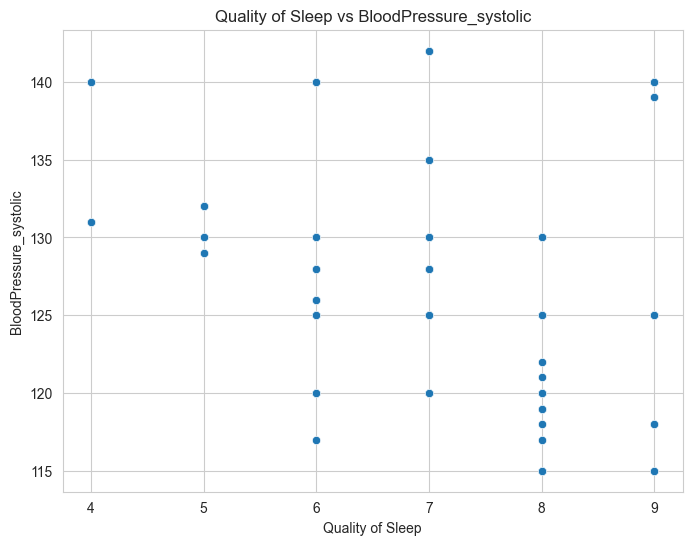

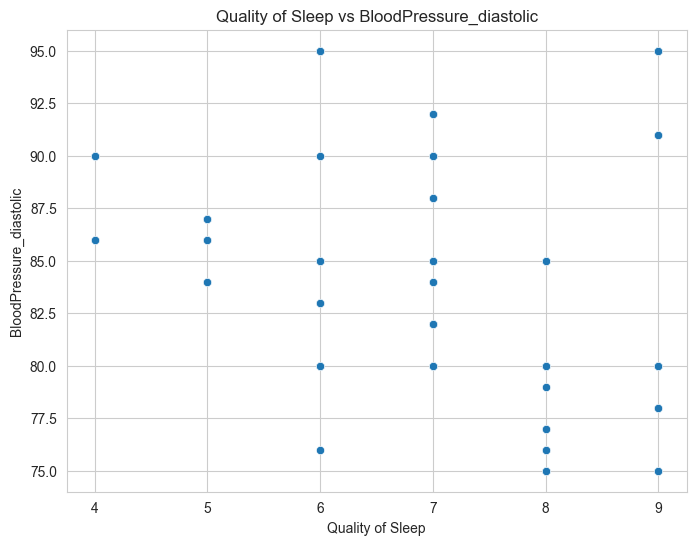

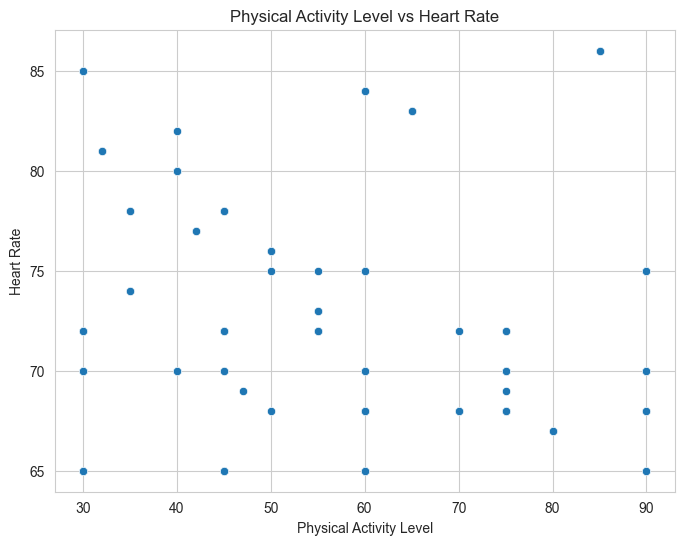

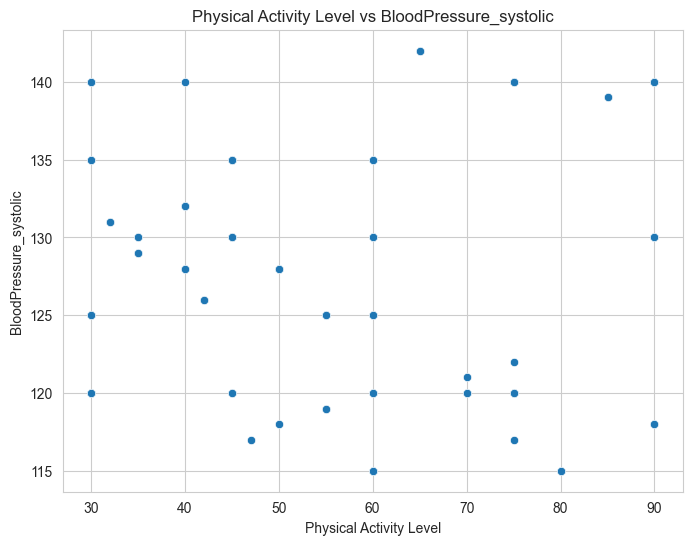

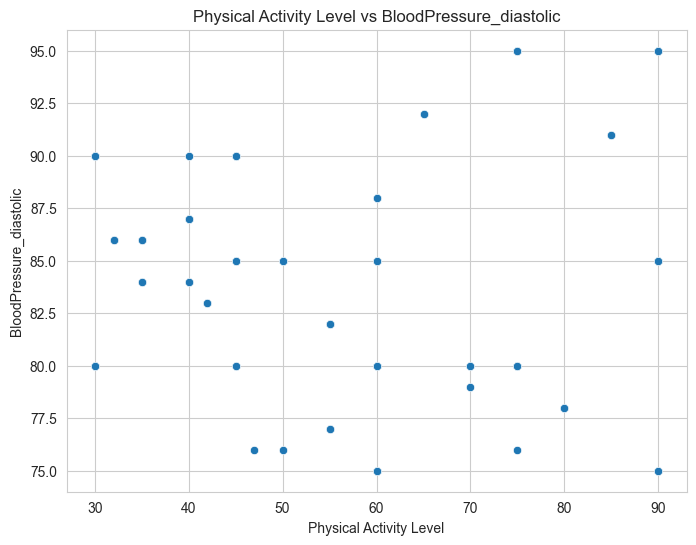

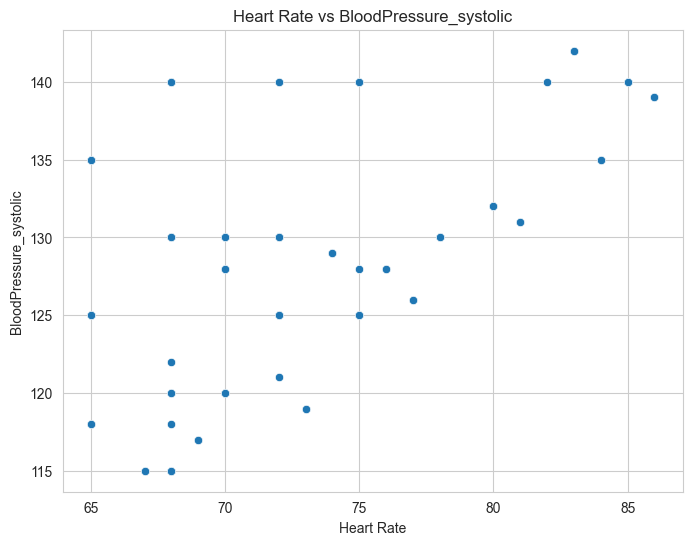

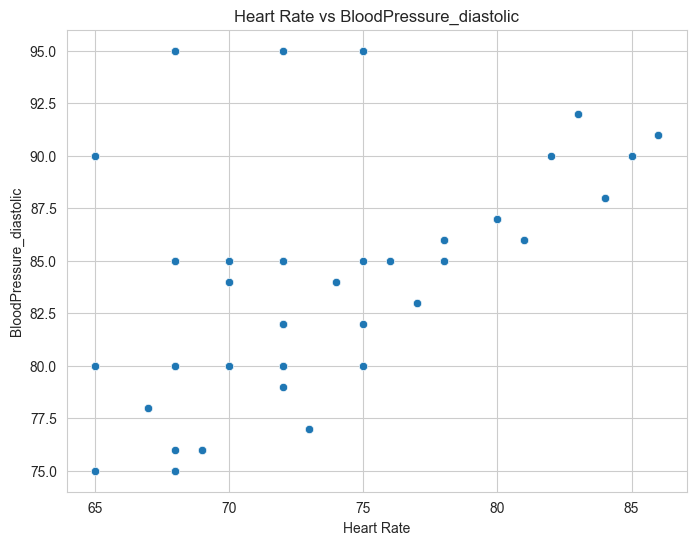

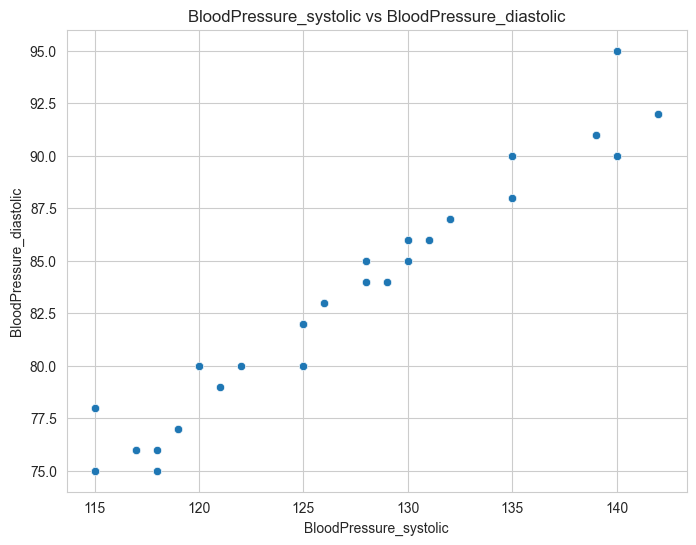

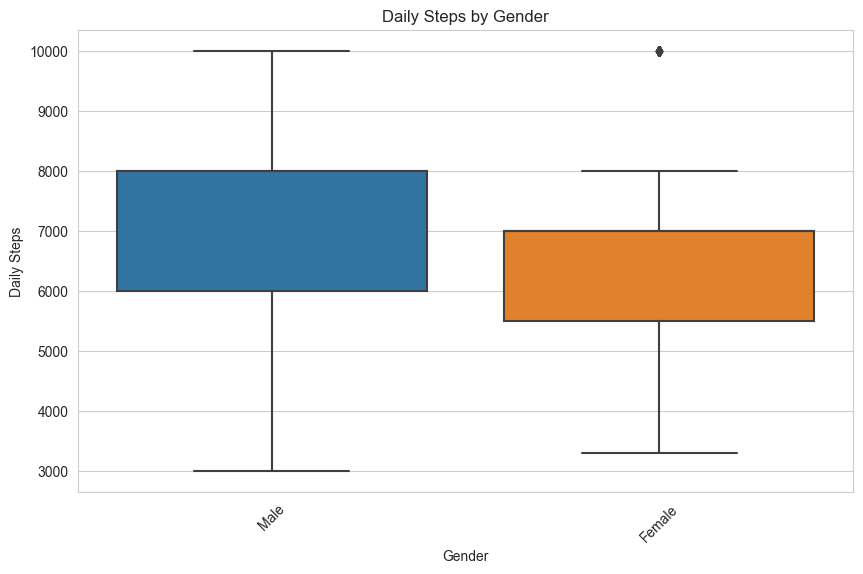

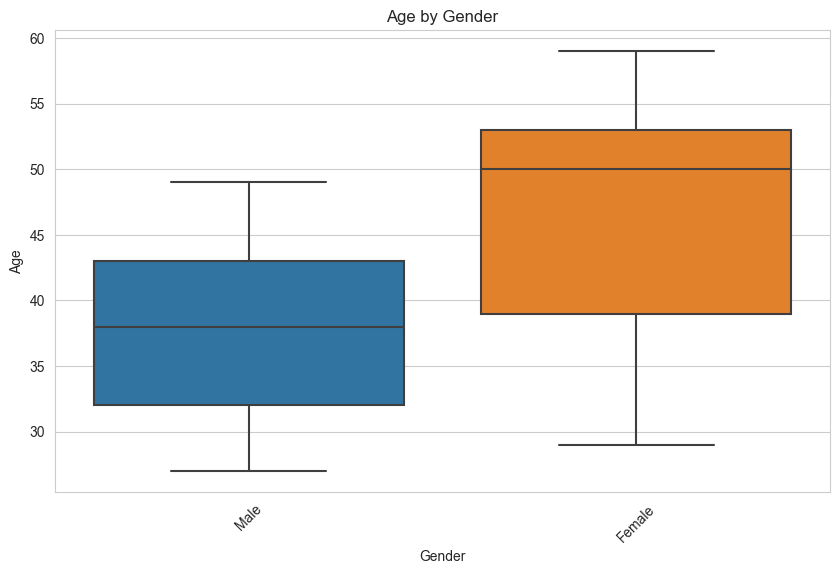

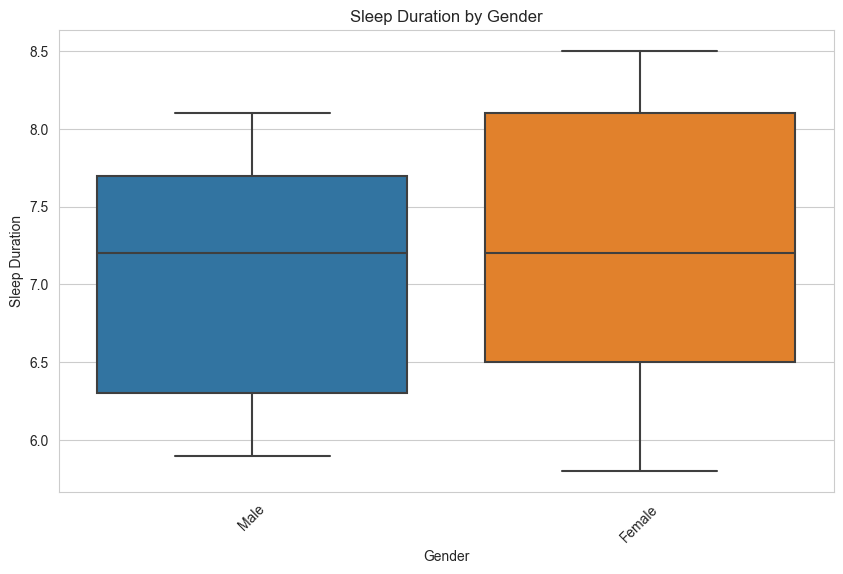

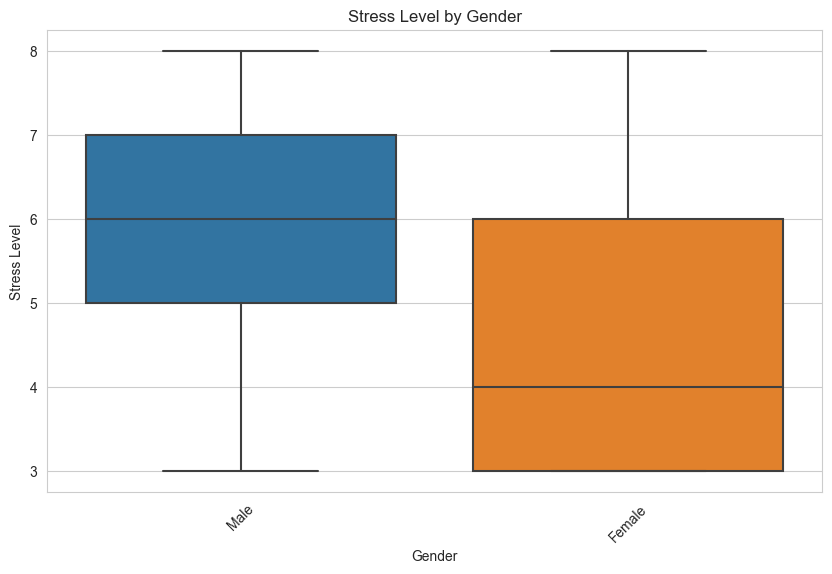

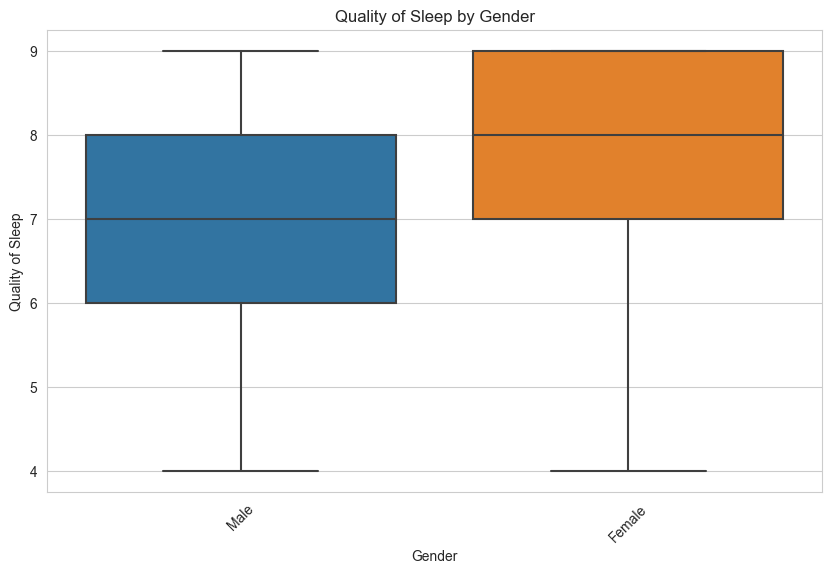

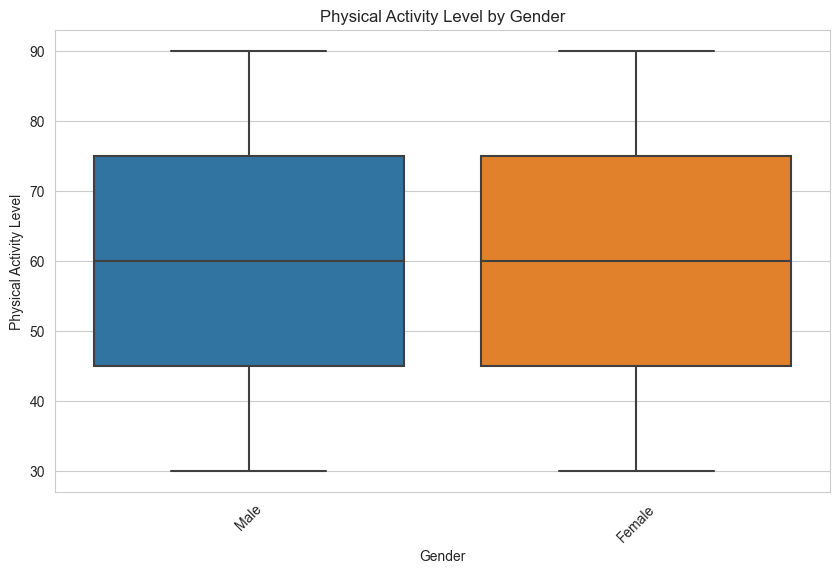

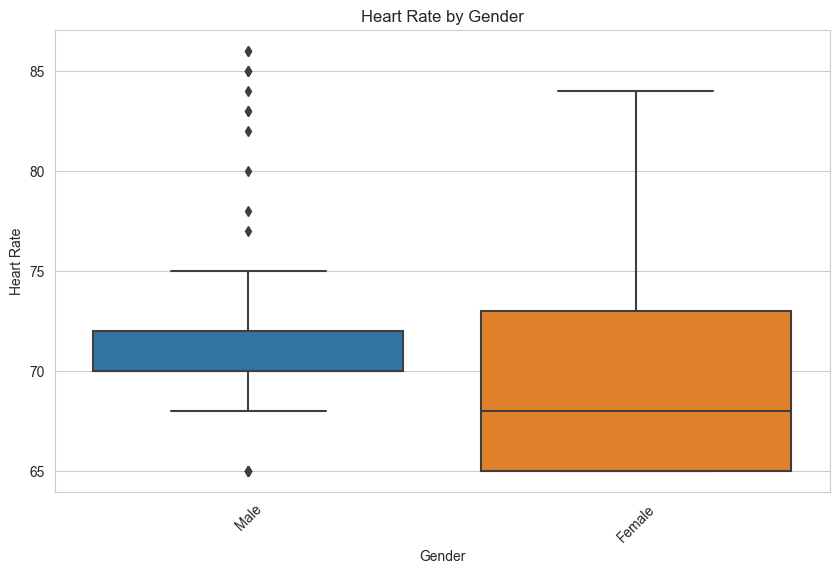

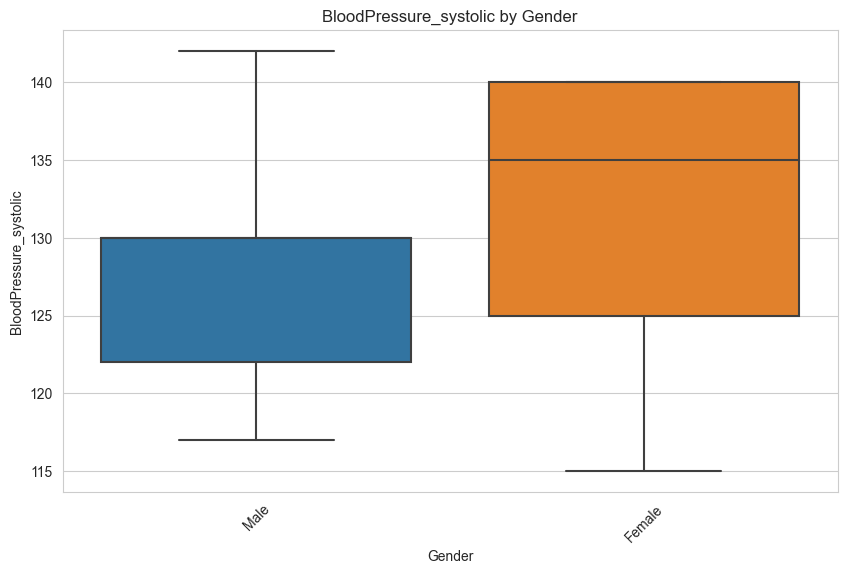

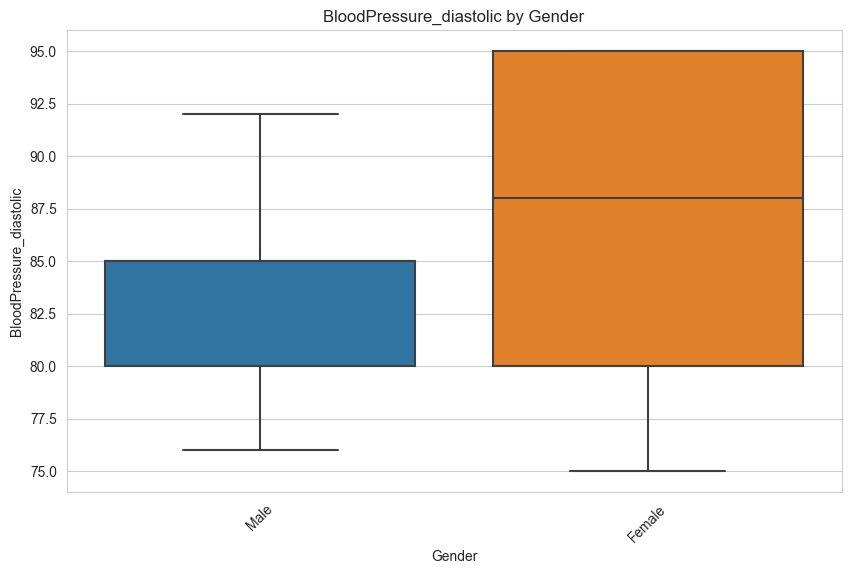

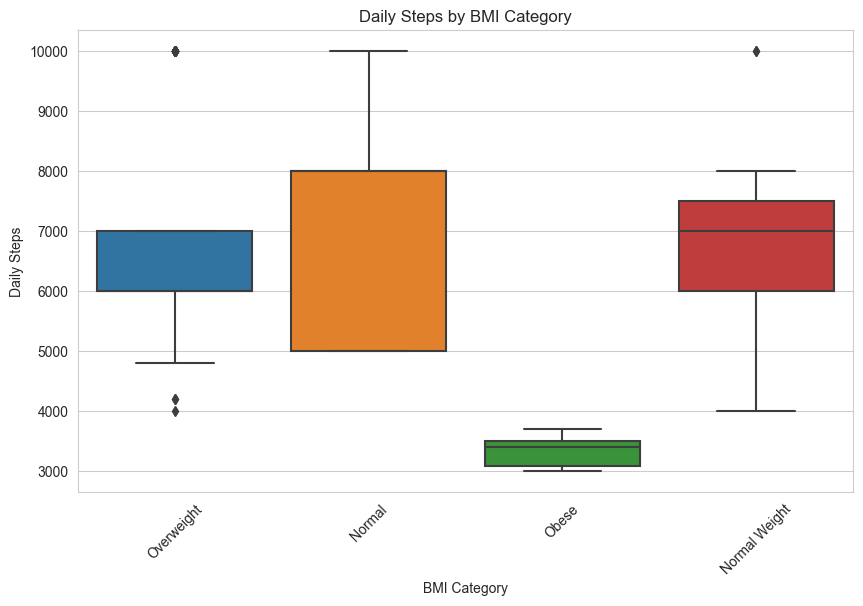

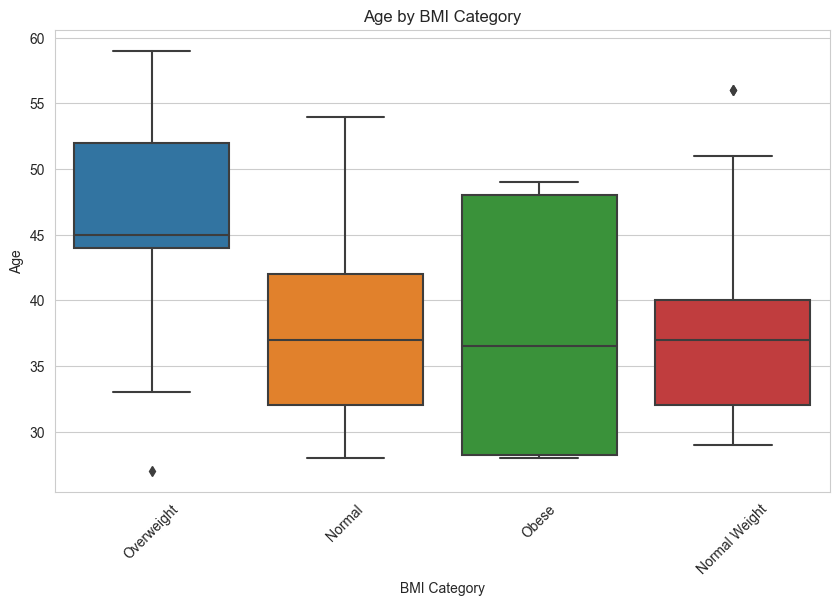

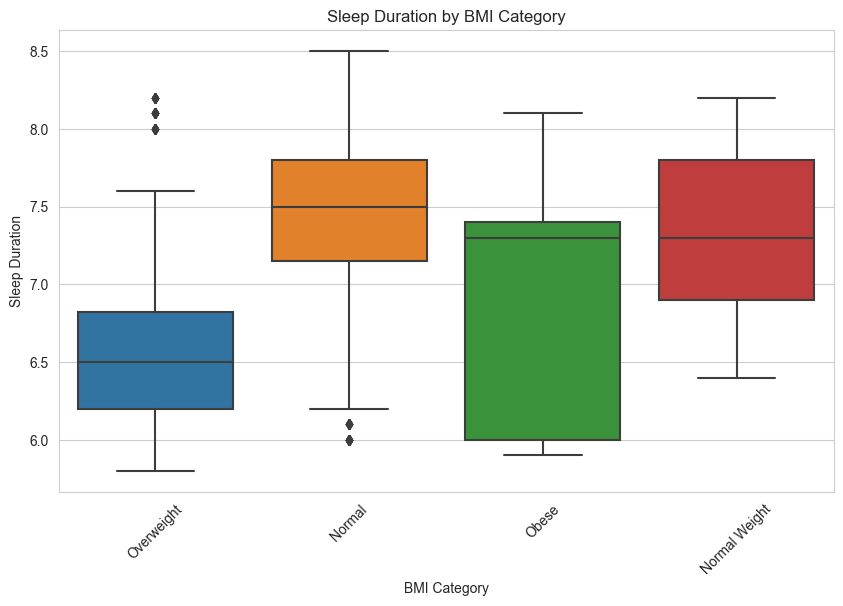

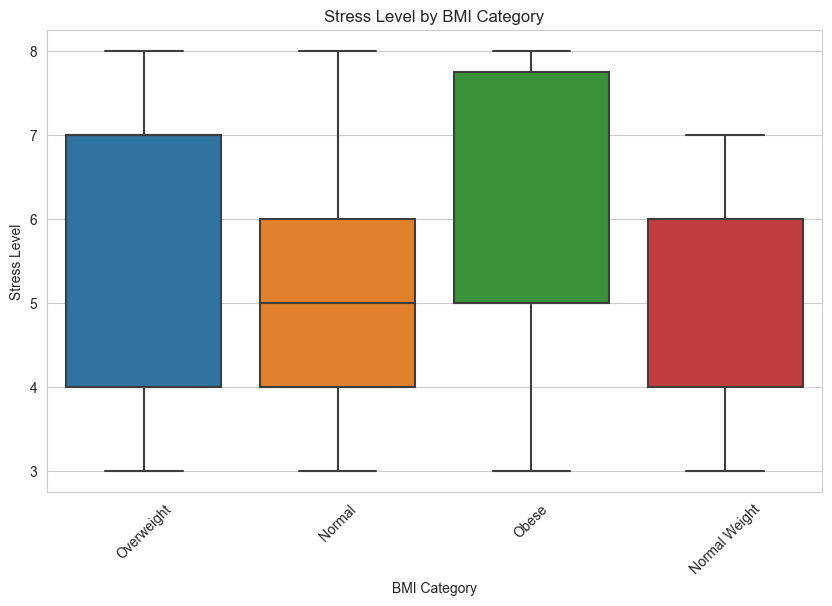

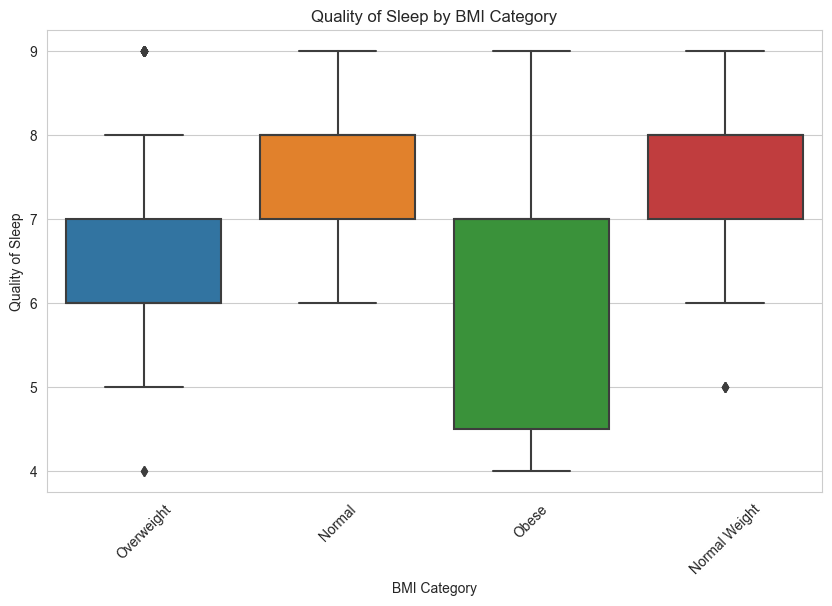

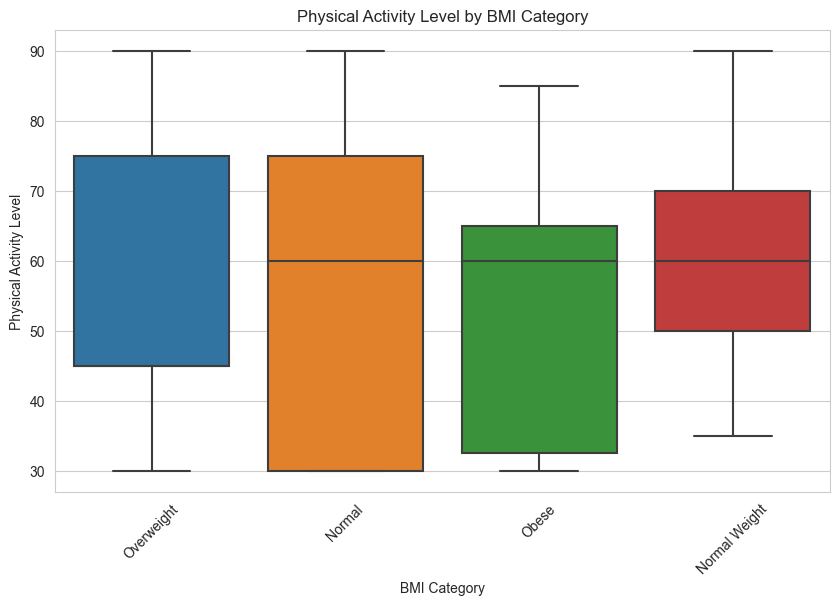

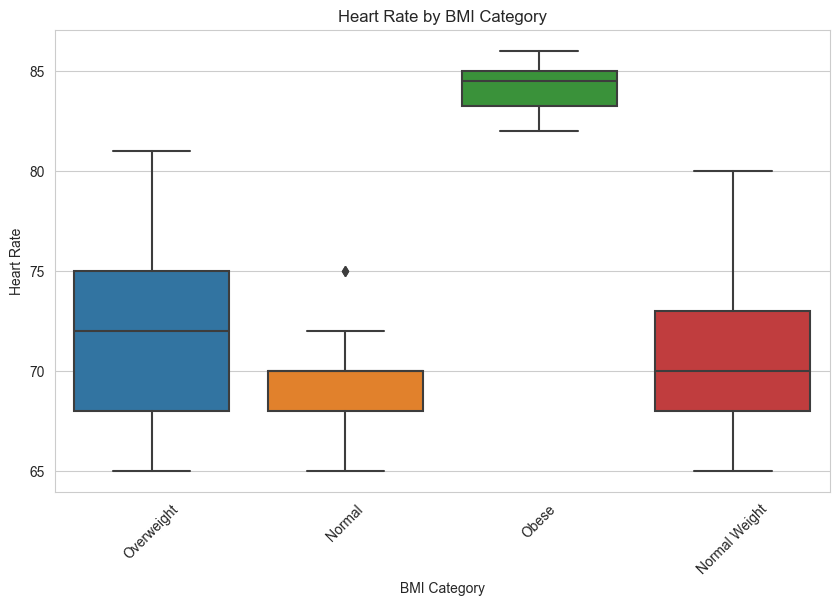

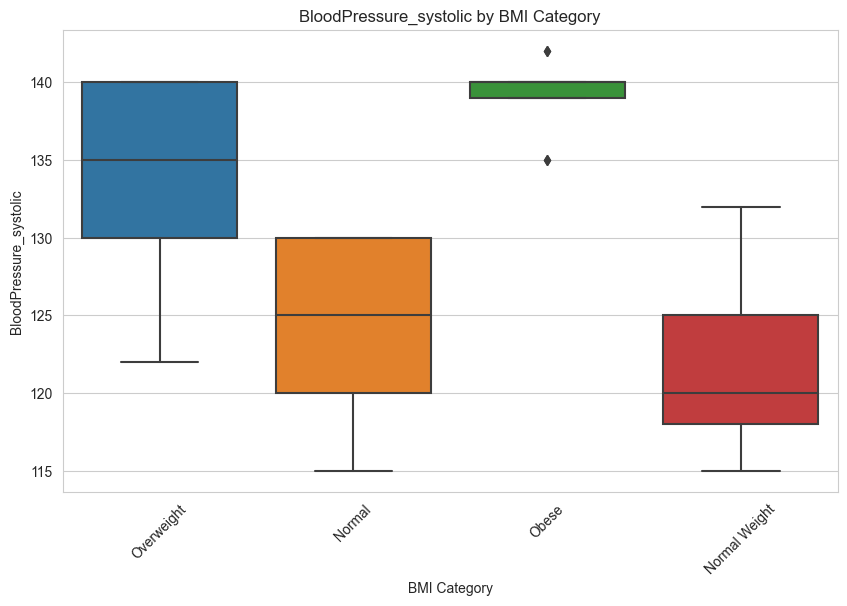

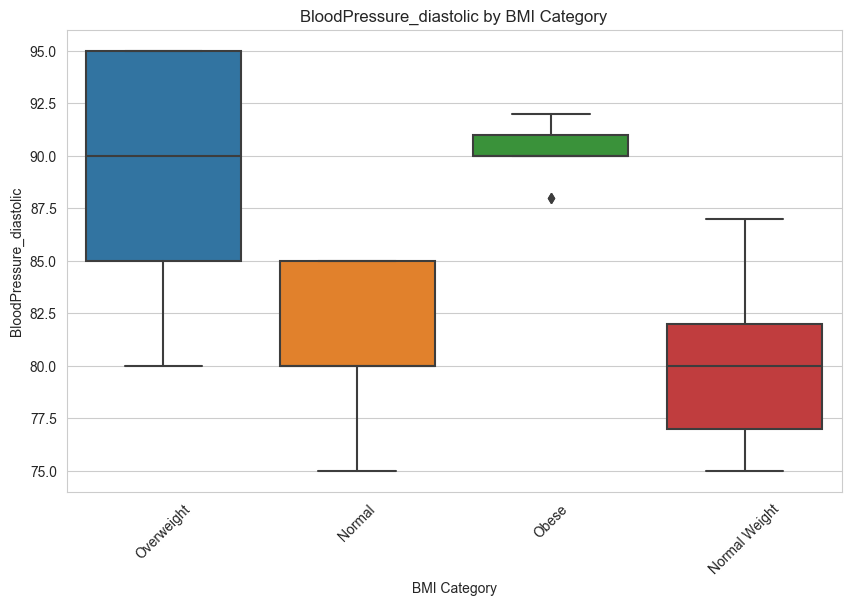

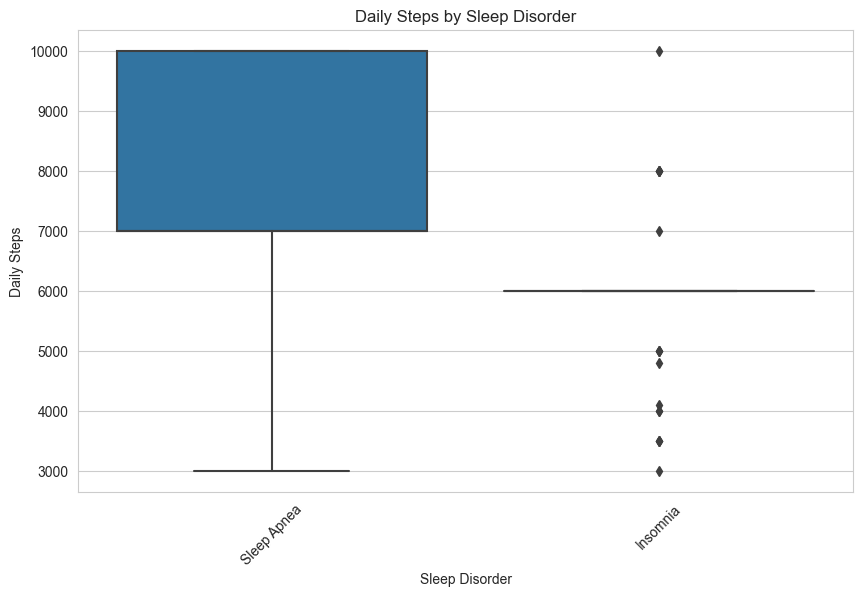

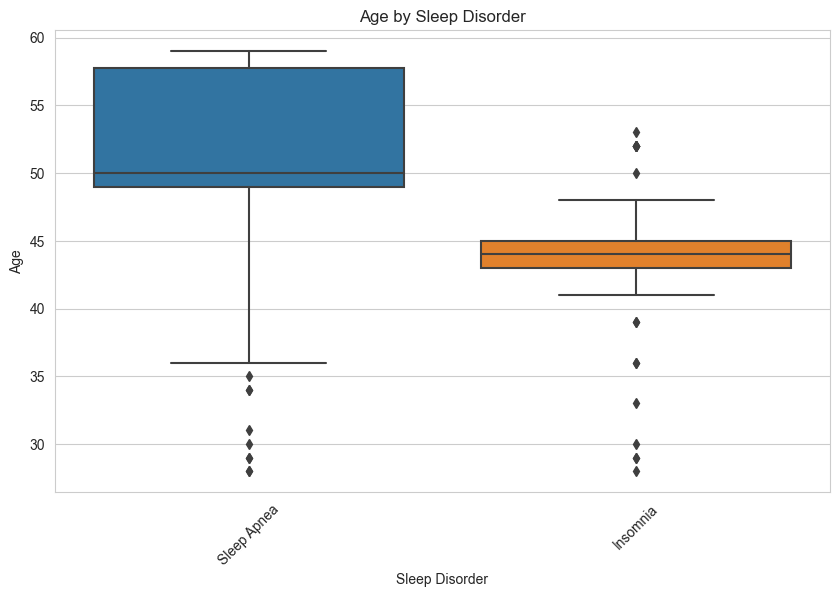

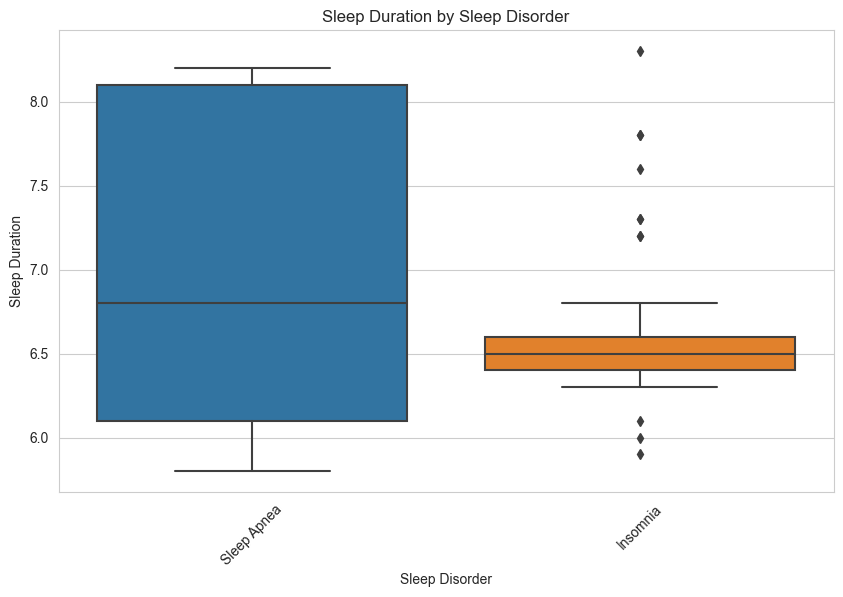

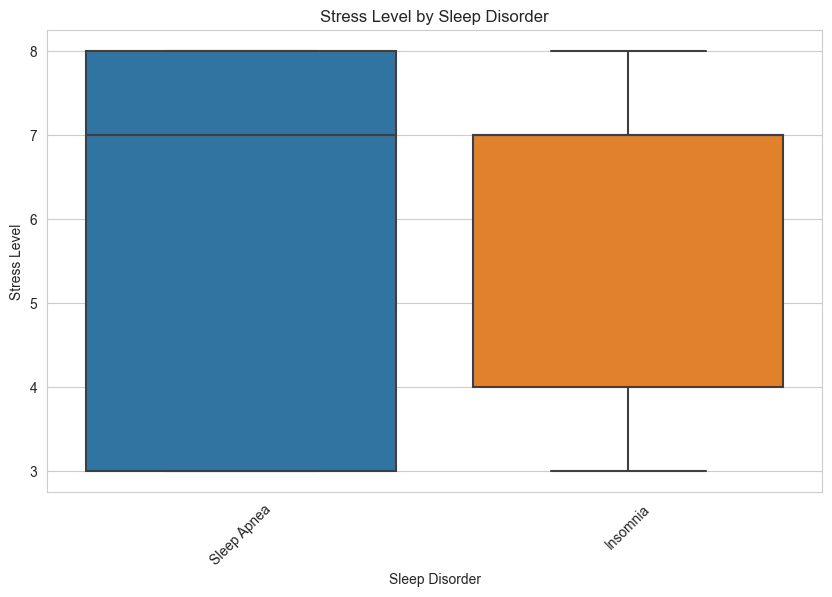

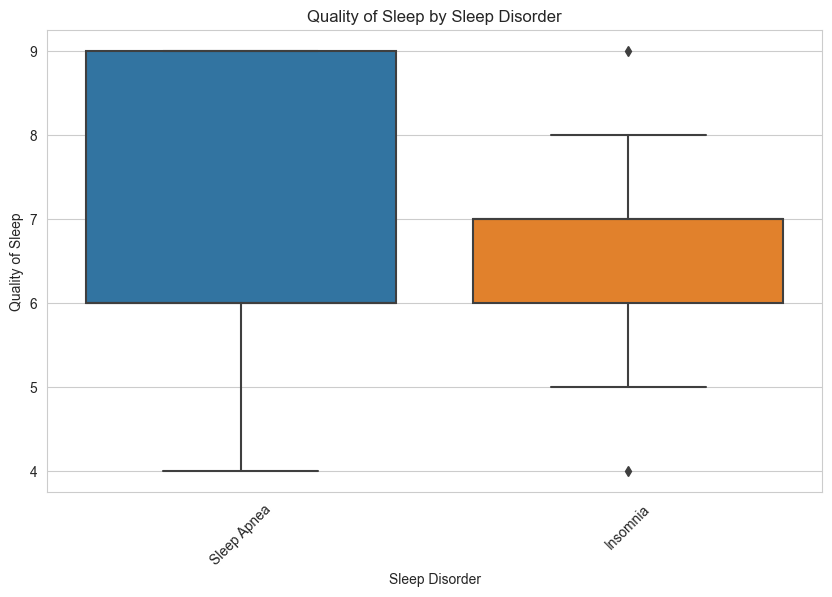

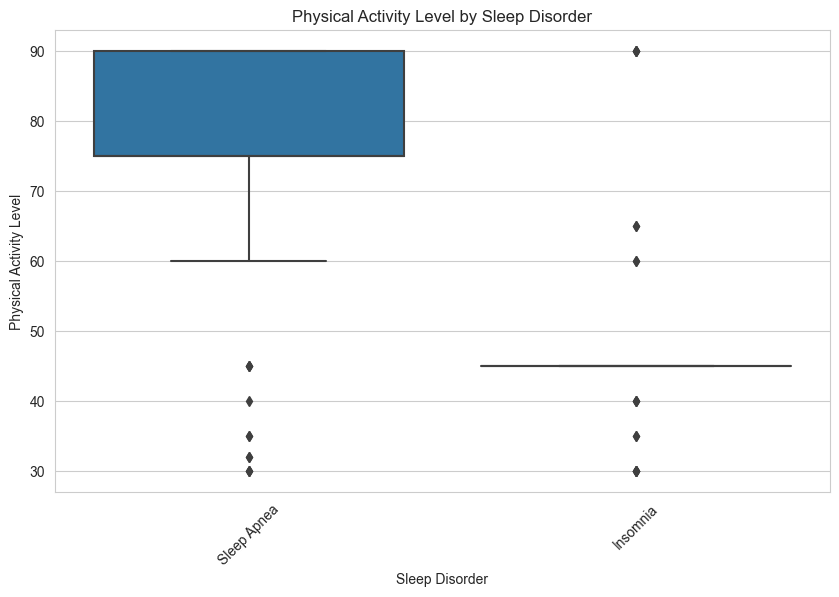

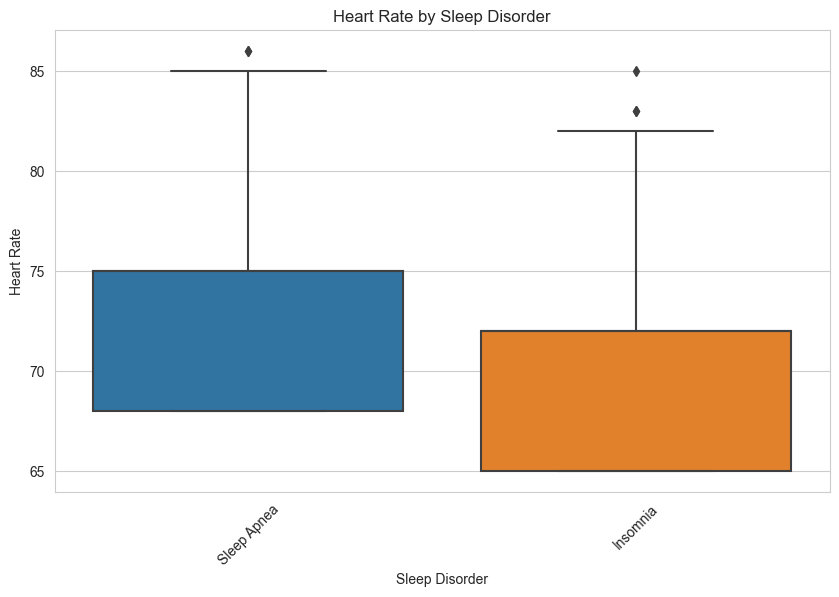

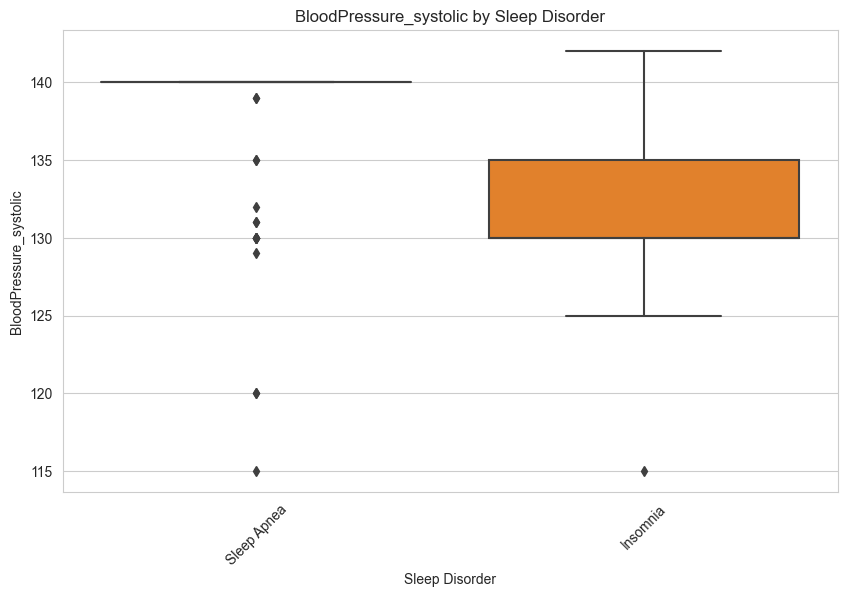

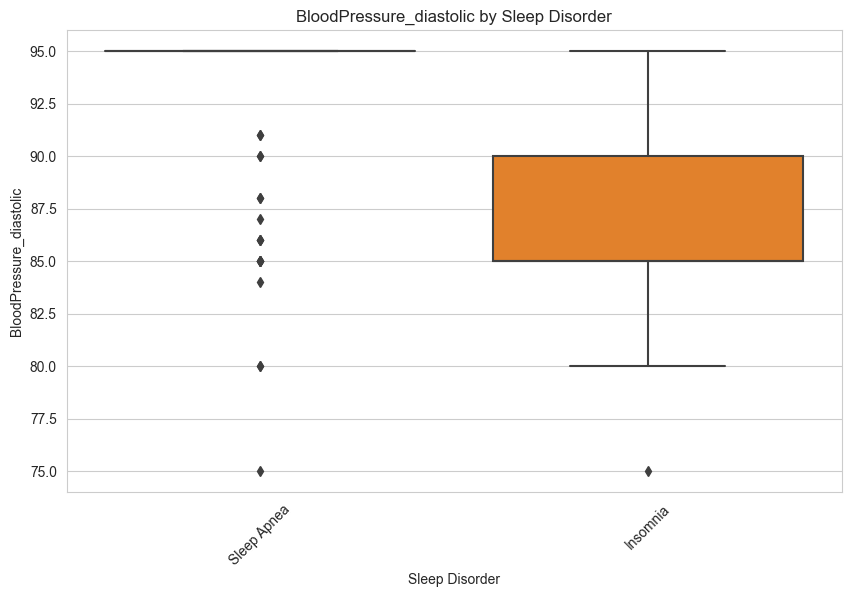

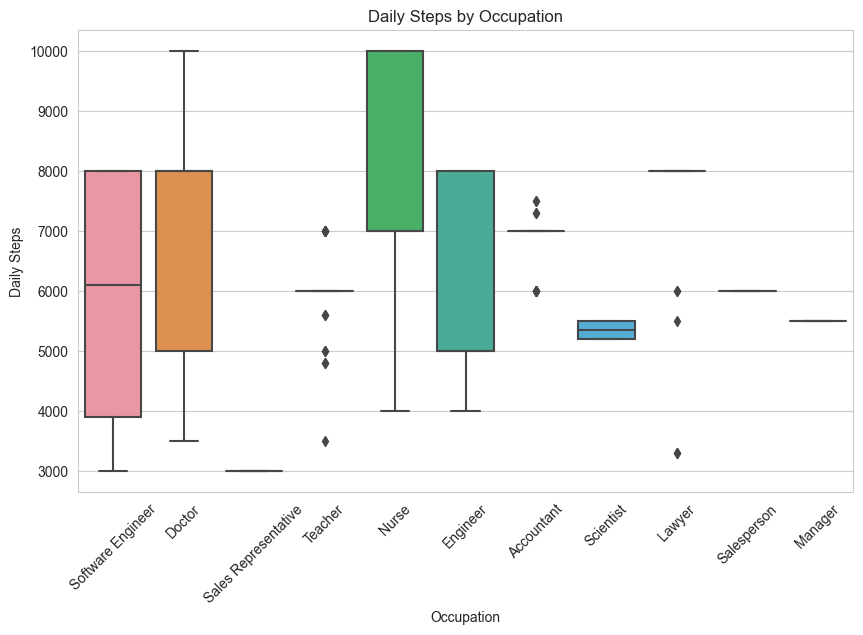

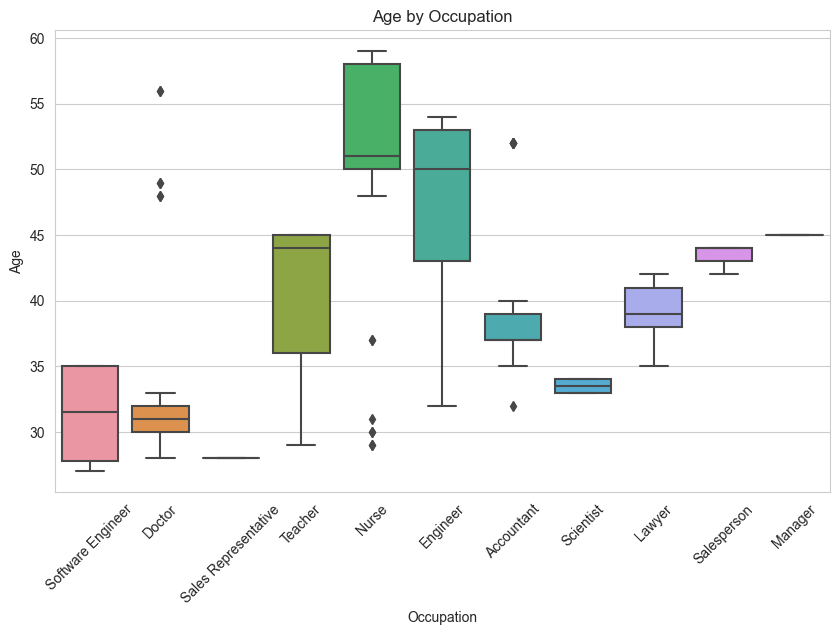

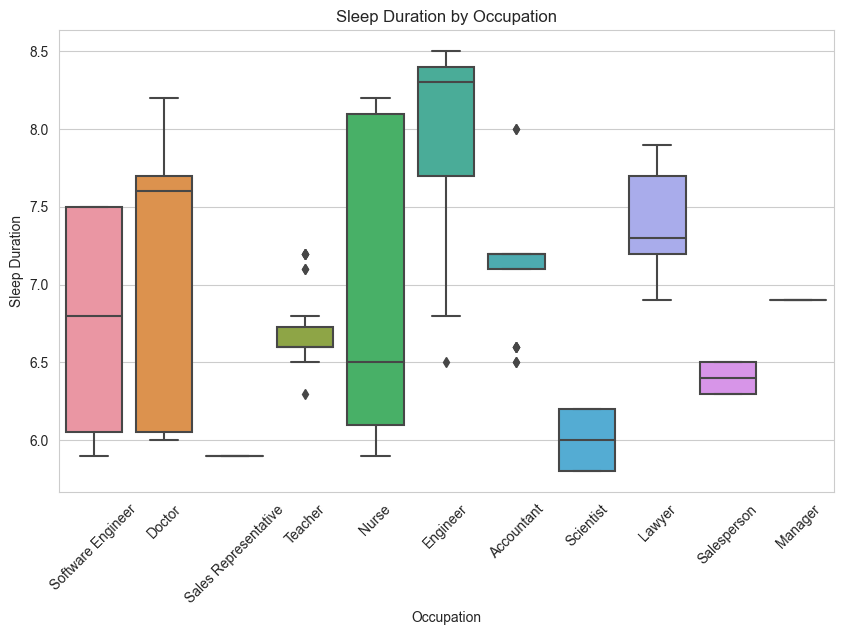

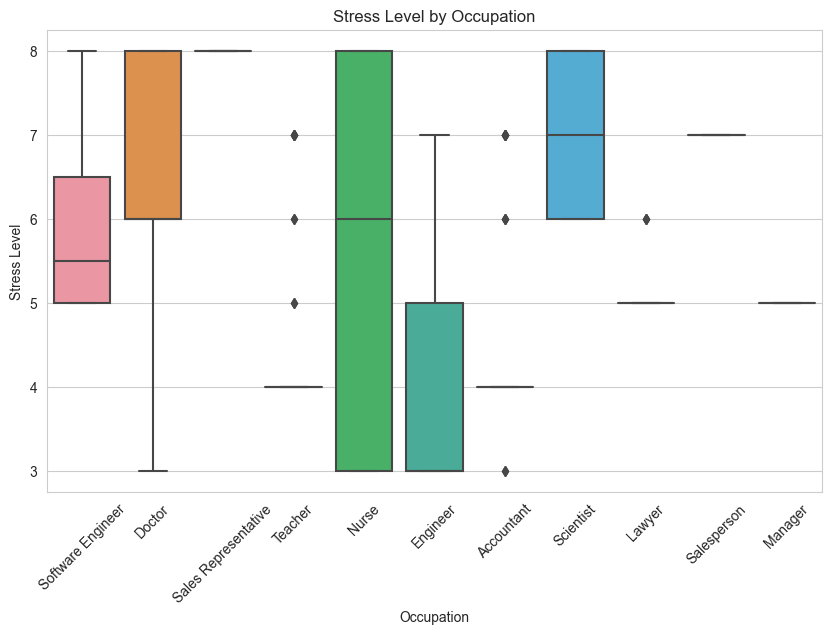

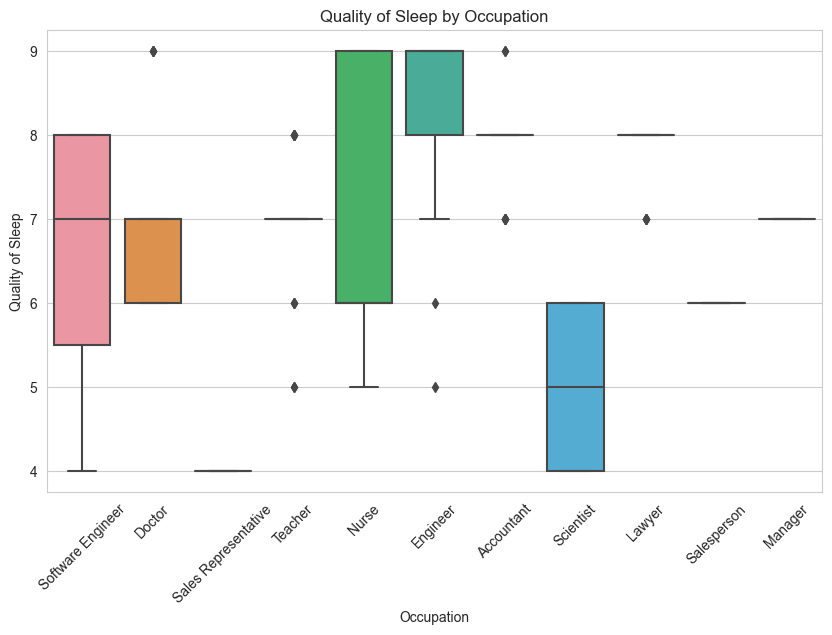

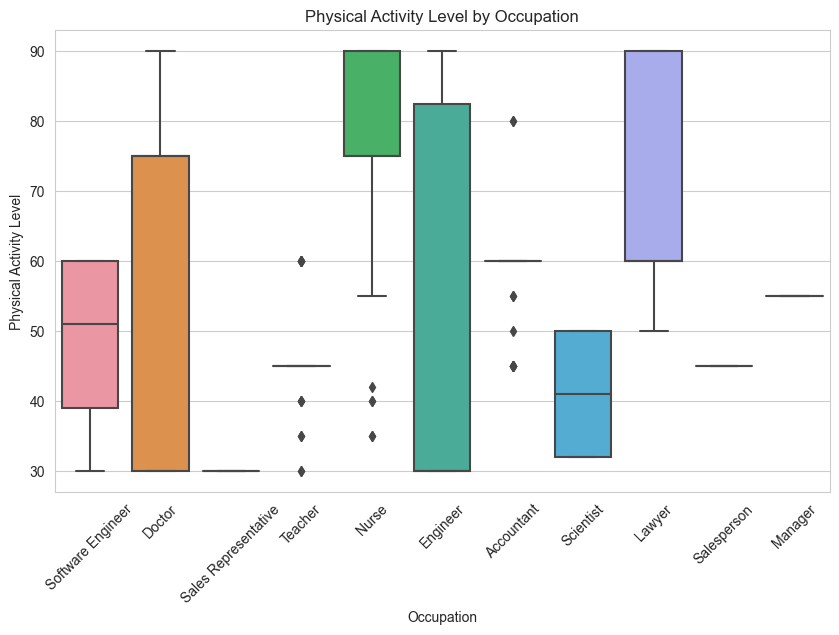

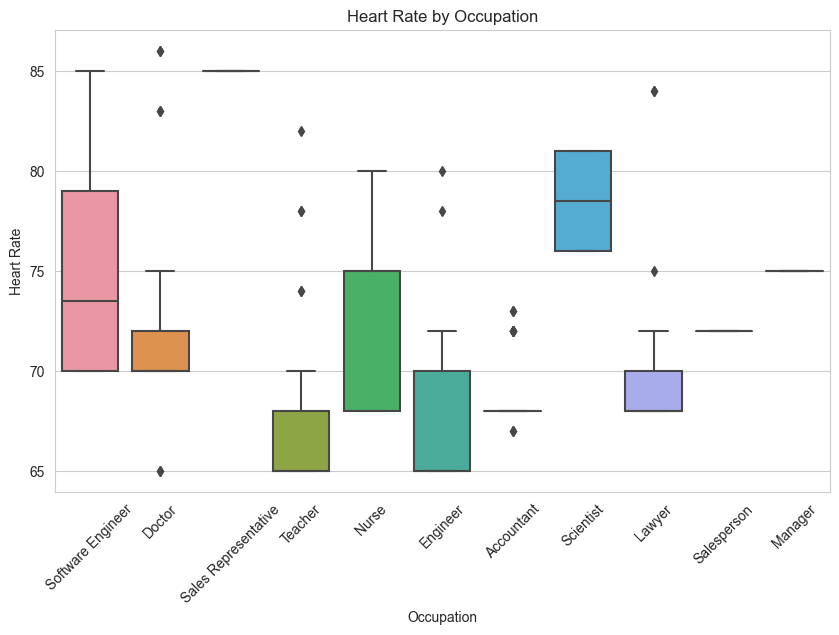

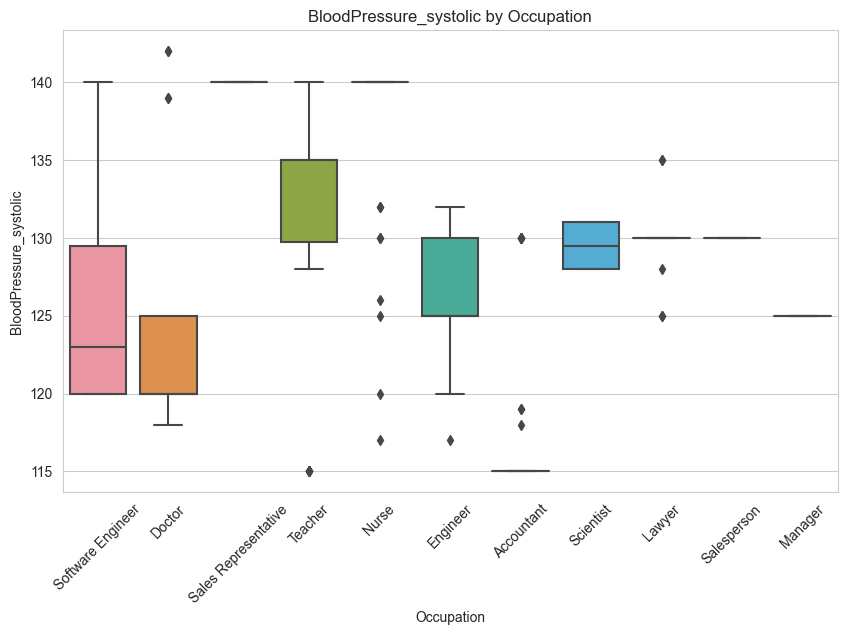

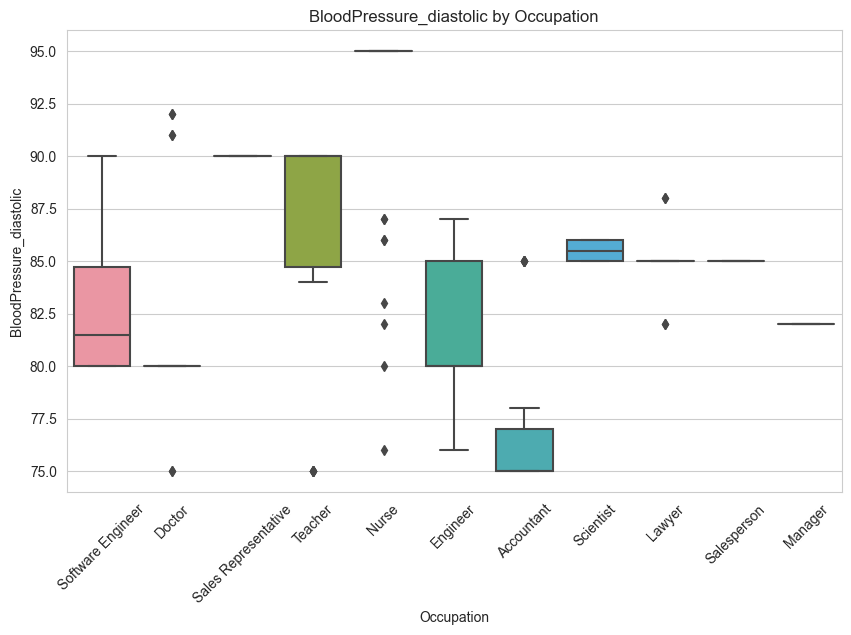

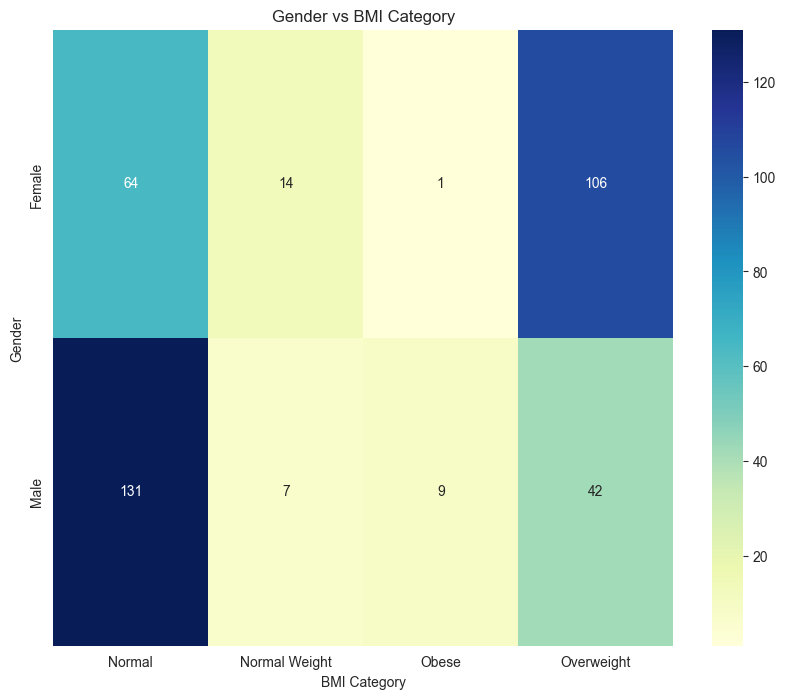

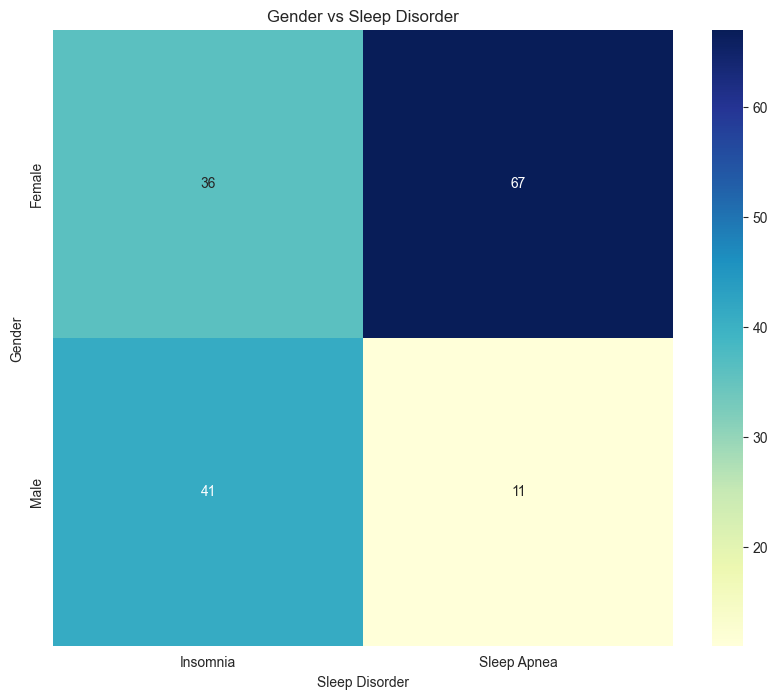

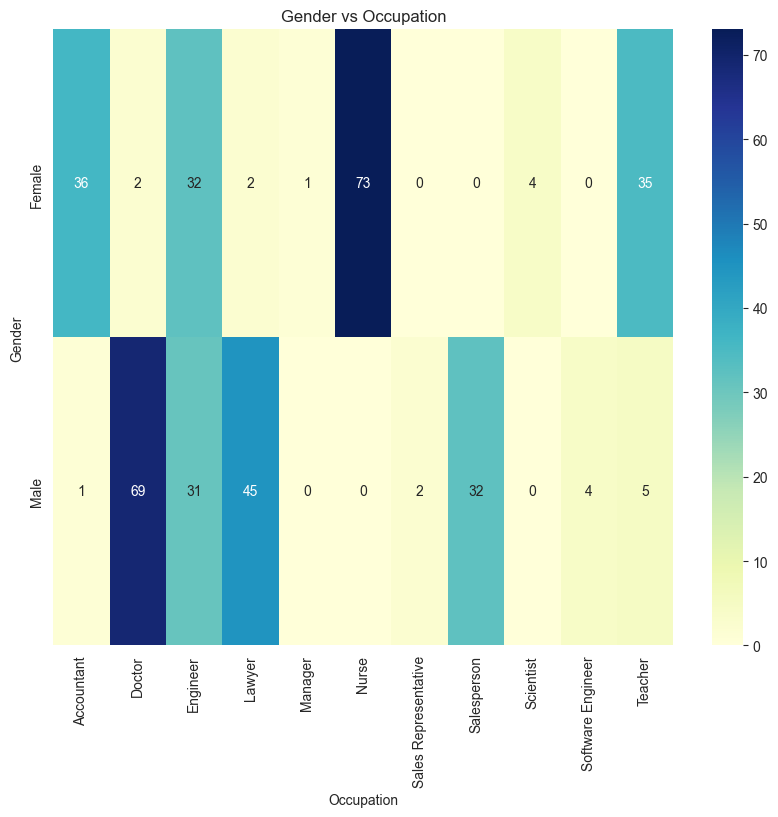

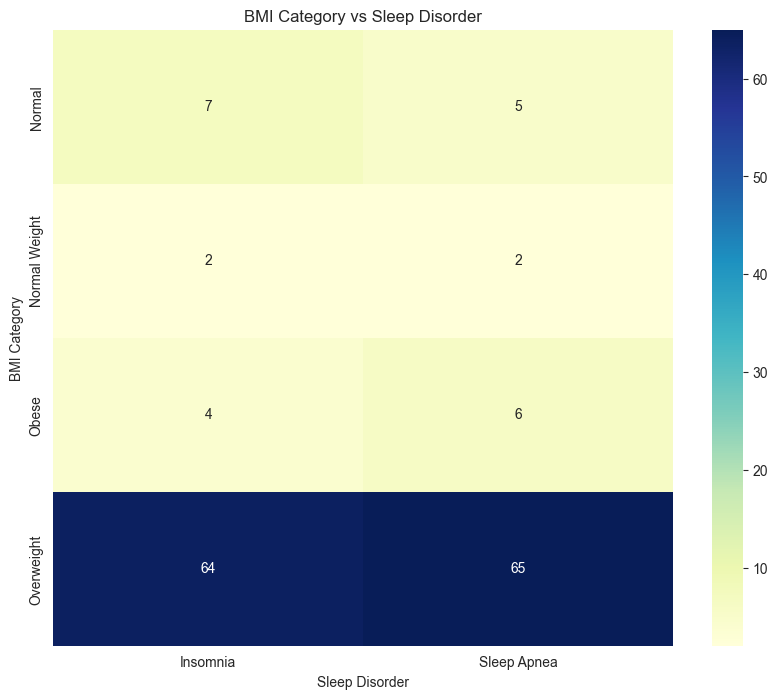

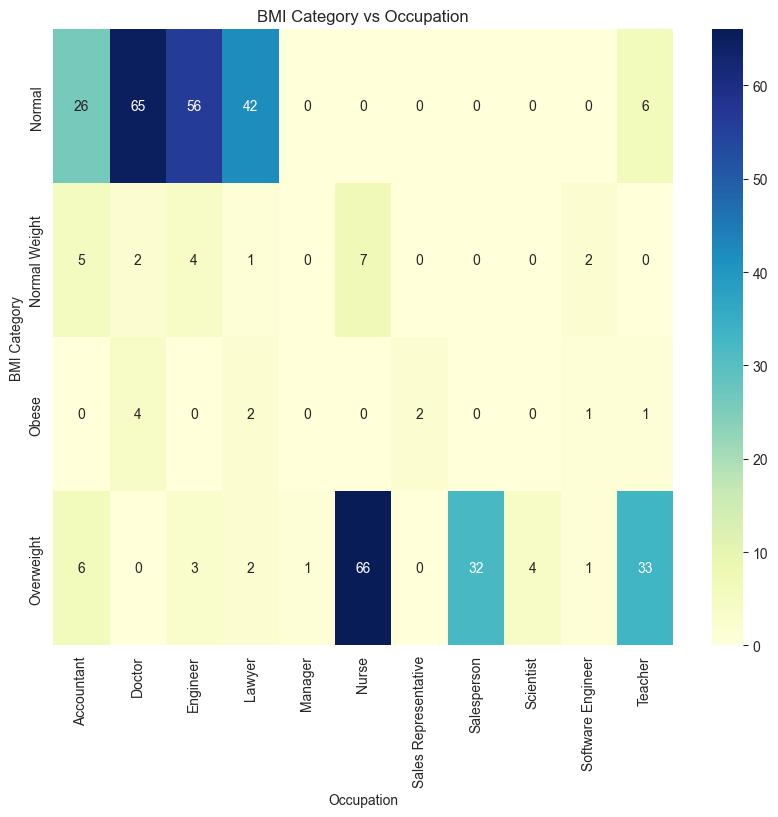

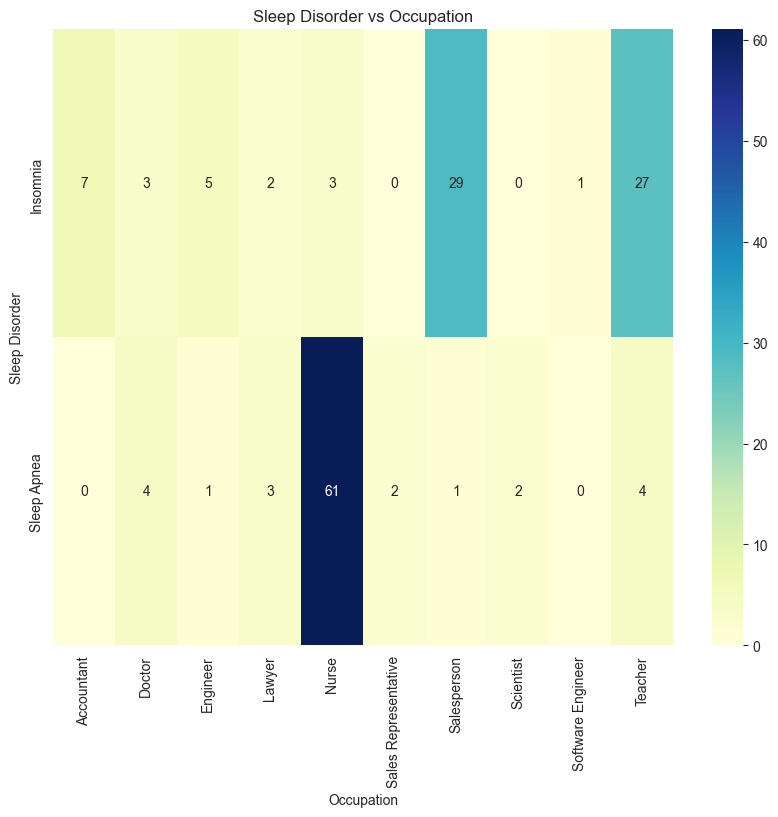

In [48]:

# 1. Quantitative vs. Quantitative
for i in range(len(quan_cols)):
    for j in range(i + 1, len(quan_cols)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=quan_cols[i], y=quan_cols[j], data=data_BP)
        plt.title(f"{quan_cols[i]} vs {quan_cols[j]}")
        plt.show()

# 2. Categorical vs. Quantitative
for cat_col in categorical_cols:
    for quan_col in quan_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=quan_col, data=data_BP)
        plt.title(f"{quan_col} by {cat_col}")
        plt.xticks(rotation=45)  # Useful if some category labels are long
        plt.show()

# 3. Categorical vs. Categorical
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        contingency_table = pd.crosstab(data_BP[categorical_cols[i]], data_BP[categorical_cols[j]])
        plt.figure(figsize=(10, 8))
        sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
        plt.title(f"{categorical_cols[i]} vs {categorical_cols[j]}")
        plt.show()


# Classification ML Models

### Data Pre-processing:
>a. Handle categorical variables
>>Encode the categorical variables using one-hot encoding:

In [71]:
data_encoded = pd.get_dummies(data_BP, columns=['Gender', 'Occupation', 'BMI Category'], drop_first=True)

>b. Split data into training and testing sets
>>Split the data into training and testing datasets using Sleep Disorder as the target variable:

In [72]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = data_encoded['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


>c. Scale features
>>Scale the features using StandardScaler:
>#### Fill NaN values with the median of the column:

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Convert numpy array back to DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Fill NaN values with median
X_train_scaled.fillna(X_train_scaled.median(), inplace=True)
X_test_scaled.fillna(X_test_scaled.median(), inplace=True)



In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
print(classification_report(y_test, lr_predictions))


              precision    recall  f1-score   support

    Insomnia       0.74      0.88      0.80        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.92      0.69      0.79        16

    accuracy                           0.89        75
   macro avg       0.87      0.85      0.85        75
weighted avg       0.90      0.89      0.89        75



In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
print(classification_report(y_test, rf_predictions))


              precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



In [76]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_predictions = gb_model.predict(X_test_scaled)
print(classification_report(y_test, gb_predictions))


              precision    recall  f1-score   support

    Insomnia       0.81      0.81      0.81        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.87      0.81      0.84        16

    accuracy                           0.91        75
   macro avg       0.88      0.87      0.87        75
weighted avg       0.91      0.91      0.91        75

